<h1><u><center>MSIN0143 Coursework Group 2 Team 8</center></u></h1>

<h1><center>An exploratory analysis of the Use-of-Force dataset with tree-based models</center></h1>

<center>Lydia H. </center>
<center>Hoang Long Nguyen Kim </center>
<center>Kam Tung C. </center>
<center>Nelly Z.</center>
<center>Chuan Yu C.</center>

<h4><center>Word Counts: 1986</center></h4>

#  Table of contents:
* [1.Introduction](#1.Introduction)
* [2.Importing Necessary Libraries](#2.Importing-Necessary-Libraries)
    * [2.1Future-proofing code for data manipulation](#2.1Future-proofing-code-for-data-manipulation)
* [3.Data Overview ](#3.Data-Overview)
    * [3.1Data loading](#3.1Data-loading)
    * [3.2Data exploration](#3.2Data-exploration)
    * [3.3Data Dictionary](#3.3Data-dictionary)
    * [3.4Variable grouping](#3.4Variable-grouping)
* [4.Exploratory Data Analysis (EDA)](#4.Exploratory-Data-Analysis-(EDA))
    * [4.1Temporal patterns](#4.1Temporal-patterns)
    * [4.2Location based patterns](#4.2Location-based-patterns)
    * [4.3Overview of CED Use](#4.3Overview-of-CED-Use)
    * [4.4Subject characteristics](#4.4Subject-characteristics)
    * [4.5Incident outcomes](#4.5Incident-outcomes)
    * [4.6Taser use across key attributes](#4.6Taser-use-across-key-attributes)
* [5.Data Cleaning and Data Transformation](#5.Data-Cleaning-and-Data-Transformation)
    * [5.1Missing data](#5.1Missing-data)
    * [5.2Removing unused columns](#5.2Removing-unused-columns)
    * [5.3Data transformation ](#5.3Data-transformation)
        * [5.3.1Feature engineering for classification](#5.3.1Feature-engineering-for-classification)
        * [5.3.2Preparing target variable](#5.3.2Preparing-target-variable)
        * [5.3.3One-Hot encoding for categorical variables](#5.3.3One-Hot-encoding-for-categorical-variables)
        * [5.3.4Final transformation](#5.3.4Final-transformation)
* [6.Prediction Models](#6.Prediction-Models)
     * [6.1Deselecting unused variables](#6.1Deselecting-unused-variables)
     * [6.2Train/test split ](#6.2Train/test-split)
     * [6.3Training the unbalanced models](#6.3Training-the-unbalanced-models)
         * [6.3.1Unbalanced: Decision Tree Model](#6.3.1Unbalanced:-Decision-Tree-Model)
         * [6.3.2Unbalanced: Random Forest Model](#6.3.2Unbalanced:-Random-Forest-Model)
         * [6.3.3Unbalanced: XGBoost Model](#6.3.3Unbalanced:-XGBoost-Model)
    * [6.4Evaluating the Unbalanced models](#6.4Evaluating-the-Unbalanced-models)
    * [6.5Re-training the models](#6.5Re-training-the-models)
        * [6.5.1Balanced: Decision Tree](#6.5.1Balanced:-Decision-Tree)
        * [6.5.2Evaluating the Balanced Decision Tree](#6.5.2Evaluating-the-Balanced-Decision-Tree)
        * [6.5.3Balanced: Random Forest model](#6.5.3Balanced:-Random-Forest-model)
        * [6.5.4Evaluating the Balanced Random Forest](#6.5.4Evaluating-the-Balanced-Random-Forest)
        * [6.5.5Balanced: XGBoost model](#6.5.5Balanced:-XGBoost-model)
    * [6.6Prediction model comparison](#6.7Prediction-model-comparison)
* [7.Limitations and Conclusions](#7.Limitations-and-Conclusions)
* [8.References](#8.References)
* [9.Appendices](#9.Appendices)
    * [9.1GenAI Usage](#9.1GenAI-Usage)
    * [9.2Project Management](#9.2Project-Management)

# 1.Introduction 

The dataset used in this project is The Metropolitan Police Use of Force which provides detailed records of incidents across Greater London. It is sourced from the London Datastore which is a free and open-data portal for anyone to access. The most recent data spans from April 2025 to October 2025 (Metropolitan Police Service, 2025).

Public trust in policing has been low in the UK, with only 34.6% of Londoners reporting trust in The Met (Dodd, 2024). Hence, investigating the use of force through data can provide insights into the whether use of force is primarily driven by incident-specific factors or by broader influences, like demographics or geographic context.

This study aims to predict the factors that lead to the deployment of CED Tasers. Predictors include whether the subject possessed weapons, drugs, or assaulted the officer. Demographic factors, including ethnicity and age, are also included to explore whether certain groups are disproportionately affected.

# 2.Importing necessary libraries

In [1]:
# The code provided for counting the words is not working, so we count the words manually

# Importing util1 library for the word count function
#!pip install util1
#from util1 import count_words_in_markdown

In [2]:
# Data Processing libraries
import pandas as pd
import numpy as np

# Importing sklearn for OneHotEncoding preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# Import numpy for any calculations
import numpy as np

#Importing relevant packages for Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Importing matplotlib and seaborn for graph visualisations
import matplotlib.pyplot as plt
import seaborn as sns
# Importing libraries for Random forest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.metrics import RocCurveDisplay

# Importing libraries for XGBoost
from sklearn.tree import plot_tree

# Installing the XGBoost externally first as it's not by default part of the Python package
%pip install xgboost
# Necessary libraries for XGBoost
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, precision_recall_curve, average_precision_score, recall_score, ConfusionMatrixDisplay, f1_score, roc_auc_score

# Installing subprocess to visualise Learning curve for the evaluation of ML model performance
import subprocess
subprocess.call("yes|pip install yellowbrick -q -q -q", shell=True)

from yellowbrick.model_selection import LearningCurve

  Using cached xgboost-3.1.2-py3-none-manylinux_2_28_x86_64.whl.metadata (2.1 kB)
Using cached xgboost-3.1.2-py3-none-manylinux_2_28_x86_64.whl (115.9 MB)
Note: you may need to restart the kernel to use updated packages.


## 2.1Future-proofing code for data manipulation

In [3]:
# To prevent the code from not executing the future, when initally changing the values in the dataset we got a warning. 
# It said that the way of doing the data changes will stop working in a future version of Pandas (specifically Pandas 3.0). 
# To prevent that the following line of code was run to make the code future proof.
pd.set_option('future.no_silent_downcasting', True)


## 3.Data Overview

## 3.1Data loading 

In [4]:
# Loading the data (later used for comparison)
df = pd.read_excel("MPS Use of Force - FY25-26.xlsx")

# Showing the first few and last few values in the dataset with all their columns
pd.set_option('display.max_columns', None)
df

,IncidentDate,IncidentTime,Incident Location: Street/Highway,Incident Location: Public Transport,Incident Location: Retail Premises,"Incident Location: Open ground (e.g. park, car park, field)",Incident Location: Licensed Premises,Incident Location: Sports or Event Stadia,Incident Location: Hospital/A&E (non-mental-health setting),Incident Location: Mental Health Setting,Incident Location: Police vehicle with prisoner handling cage,Incident Location: Police vehicle without prisoner handling cage,Incident Location: Dwelling,Incident Location: Police station (excluding custody block),Incident Location: Custody Block,Incident Location: Ambulance,Incident Location: School/College/University,Incident Location: Other,Borough,PrimaryConduct,AssaultedBySubject,ThreatenedWithWeapon,AssaultedWithWeapon,Impact Factor: Possesion of a weapon,Impact Factor: Alcohol,Impact Factor: Drugs,Impact Factor: Mental Health,Impact Factor: Prior Knowledge,Impact Factor: Size/Gender/Build,Impact Factor: Acute Behavioural Disorder,Impact Factor: Crowd,Impact Factor: Other,Reason for Force: Protect self,Reason for Force: Protect Public,Reason for Force: Protect Subject,Reason for Force: Protect Other Officers,Reason for Force: Prevent Offence,Reason for Force: Secure Evidence,Reason for Force: Effect Stop and search,Reason for Force: Effect Search in custody,Reason for Force: Effect other search,Reason for Force: Effect Arrest,Reason for Force: Method of Entry,Reason for Force: Remove Handcuffs,Reason for Force: Prevent Harm,Reason for Force: Prevent Escape,Reason for Force: Other,Reason for Force: Prevent self-harm,MainDuty,SingleCrewed,TrainedCED,CarryingCED,Tactic 1,Effective 1,Tactic 2,Effective 2,Tactic 3,Effective 3,Tactic 4,Effective 4,Tactic 5,Effective 5,Tactic 6,Effective 6,Tactic 7,Effective 7,Tactic 8,Effective 8,Tactic 9,Effective 9,Tactic 10,Effective 10,Tactic 11,Effective 11,Tactic 12,Effective 12,Tactic 13,Effective 13,Tactic 14,Effective 14,Tactic 15,Effective 15,Tactic 16,Effective 16,Tactic 17,Effective 17,Tactic 18,Effective 18,Tactic 19,Effective 19,Tactic 20,Tactic Effective 20,CED Used,CED Device Serial No,CED Drawn,CED Aimed,CED Arced,CED Red-Dotted,CED Drive Stun,CED Drive Stun Repeat Application,CED Angle Drive Stun,CED Fired,CED Fired Cartridge Number,CED Fired 5 Secs Cycle Interrupted,CED Fired Repeat Cycle Same Cartridge,CED Fired Total Number Of Cycles,CED Fired Cycle Extended Beyond 5 Secs,CED Fired Miss With One Probe,CED Fired Miss With Both Probes,CED Fired Miss With None Probes,CED Front 1,CED Front 2,CED Front 3,CED Front 4,CED Front 5,CED Front 6,CED Front 7,CED Front 8,CED Front 9,CED Front 10,CED Front 11,CED Front 12,CED Front 13,CED Front 14,CED Front 15,CED Back A,CED Back B,CED Back C,CED Back D,CED Back E,CED Back F,CED Back G,CED Back H,CED Back J,CED Back K,CED2 Drawn,CED2 Aimed,CED2 ArCED2,CED2 Red-Dotted,CED2 Drive Stun,CED2 Drive Stun Repeat Application,CED2 Angle Drive Stun,CED2 Fired,CED2 Fired Cartridge Number,CED2 Fired 5 Secs Cycle Interrupted,CED2 Fired Repeat Cycle Same Cartridge,CED2 Fired Total Number Of Cycles,CED2 Fired Cycle Extended Beyond 5 Secs,CED2 Fired Miss With One Probe,CED2 Fired Miss With Both Probes,CED2 Fired Miss With None Probes,CED2 Front 1,CED2 Front 2,CED2 Front 3,CED2 Front 4,CED2 Front 5,CED2 Front 6,CED2 Front 7,CED2 Front 8,CED2 Front 9,CED2 Front 10,CED2 Front 11,CED2 Front 12,CED2 Front 13,CED2 Front 14,CED2 Front 15,CED2 Back A,CED2 Back B,CED2 Back C,CED2 Back D,CED2 Back E,CED2 Back F,CED2 Back G,CED2 Back H,CED2 Back J,CED2 Back K,CED3 Drawn,CED3 Aimed,CED3 ArCED3,CED3 Red-Dotted,CED3 Drive Stun,CED3 Drive Stun Repeat Application,CED3 Angle Drive Stun,CED3 Fired,CED3 Fired Cartridge Number,CED3 Fired 5 Secs Cycle Interrupted,CED3 Fired Repeat Cycle Same Cartridge,CED3 Fired Total Number Of Cycles,CED3 Fired Cycle Extended Beyond 5 Secs,CED3 Fired Miss With One Probe,CED3 Fired Miss With Both Probes,CED3 Fired Miss With None Probes,CED3 Front 1,CED3 Front 2,CED3 Front

## 3.2Data exploration

In [5]:
# For clarity showing how many attributes and rows are in the dataset a single line
print("Data shape (rows, columns):", df.shape)

Data shape (rows, columns): (64155, 284)


In [6]:
# Display the columns to verify exact names
print(df.columns.tolist())

['IncidentDate', 'IncidentTime', 'Incident Location: Street/Highway', 'Incident Location: Public Transport', 'Incident Location: Retail Premises', 'Incident Location: Open ground (e.g. park, car park, field)', 'Incident Location: Licensed Premises', 'Incident Location: Sports or Event Stadia', 'Incident Location: Hospital/A&E (non-mental-health setting)', 'Incident Location: Mental Health Setting', 'Incident Location: Police vehicle with prisoner handling cage', 'Incident Location: Police vehicle without prisoner handling cage', 'Incident Location: Dwelling', 'Incident Location: Police station (excluding custody block)', 'Incident Location: Custody Block', 'Incident Location: Ambulance', 'Incident Location: School/College/University', 'Incident Location: Other', 'Borough', 'PrimaryConduct', 'AssaultedBySubject', 'ThreatenedWithWeapon', 'AssaultedWithWeapon', 'Impact Factor: Possesion of a weapon', 'Impact Factor: Alcohol', 'Impact Factor: Drugs', 'Impact Factor: Mental Health', 'Impact

From an initial overview of the data, it became clear that the analysis would rely less on numerical patterns and more on comparisons across groups and binary indicators. 

## 3.3Data dictionary 

In [7]:
# This dictionary provides a clearer overview of the data, by presenting the ColumnName, its description and example of value.
# Define the data compactly as a list of tuples (Column Name, Data Type, Description, Example)
data_dictionary = [
    ("IncidentDate", "Date", "The date on which the incident occurred.", "01/01/2021"),
    ("IncidentTime", "Time", "The specific time of day the incident occurred.", "00:30:00"),
    ("Incident Location", "String (Boolean: Yes/No)", "Type of location, categories: Street/Highway, Public Transport, Retail Premises, Open ground (parks/fields), Licensed Premises, Sports/Event Stadia, Hospital/A&E, Mental Health Setting, Police vehicle (with/without cage), Dwelling, Police station, Custody Block, Ambulance, School/College/University, Other.", "Yes"),
    ("Borough", "String", "The London borough where the incident occurred.", "Barnet"),
    ("PrimaryConduct", "String", "The primary conduct or behavior of the subject.", "Compliant"),
    ("AssaultedBySubject", "String (Boolean: Yes/No)", "Indicates if the officer was assaulted by the subject.", "No"),
    ("ThreatenedWithWeapon", "String (Boolean: Yes/No)", "Indicates if the officer was threatened with a weapon.", "No"),
    ("AssaultedWithWeapon", "String (Boolean: Yes/No)", "Indicates if the officer was assaulted with a weapon.", "No"),
    ("Impact Factor", "String (Boolean: Yes/No)", "Factors influencing the incident. Categories: Possession of a weapon, Alcohol, Drugs, Mental Health, Prior Knowledge, Size/Gender/Build, Acute Behavioural Disorder, Crowd, Other.", "Yes"),
    ("Reason for Force", "String (Boolean: Yes/No)", "Officer's justification for force. Categories: Protect Self/Public/Subject/Officers, Prevent Offence/Escape/Harm/Self-harm, Secure Evidence, Effect Arrest, Method of Entry, Remove Handcuffs, Stop and Search (various types).", "Yes"),
    ("MainDuty", "String", "The main duty performed by the officer at the time.", "Mobile Patrol"),
    ("CED Used", "String", "Indicates what type of CED was used (Predictor Variable).", "X2 Taser"),
    ("SingleCrewed", "String (Boolean: Yes/No)", "Indicates if the officer was working alone.", "No"),
    ("TrainedCED", "String (Boolean: Yes/No)", "Indicates if the officer is trained in CED (Taser) use.", "Yes"),
    ("CarryingCED", "String (Boolean: Yes/No)", "Indicates if the officer was carrying a CED.", "Yes"),
    ("Tactic and Effectiveness", "String", "Repeating series of fields (1-20) detailing the tactic used and whether it was effective.", "Tactic: Non-compliant handcuffing"),
    ("CED Details", "String", "Details of CED use. Includes: Drawn, Aimed, Arced, Red-Dotted, Drive Stun, Fired (Cartridge/Cycle details), and Front/Back body mapping for multiple CEDs (CED2, CED3, CED4).", "Yes"),
    ("Firearms Aimed", "String (Boolean: Yes/No)", "Indicates if a firearm was aimed.", "No"),
    ("Firearms Fired", "String (Boolean: Yes/No)", "Indicates if a firearm was fired.", "No"),
    ("SubjectAge", "String", "The age group of the subject.", "18-34"),
    ("SubjectGender", "String", "The gender of the subject.", "Male"),
    ("SubjectEthnicity", "String", "The ethnicity of the subject.", "White"),
    ("PhysicalDisability", "String (Boolean: Yes/No)", "Indicates if the subject has a physical disability.", "No"),
    ("MentalDisability", "String (Boolean: Yes/No)", "Indicates if the subject has a mental disability.", "No"),
    ("StaffInjured", "String (Boolean: Yes/No)", "Indicates if any staff member was injured.", "No"),
    ("StaffInjuryIntentional", "String (Boolean: Yes/No)", "Indicates if the staff injury was intentional.", "No"),
    ("StaffInjuryLevel", "String", "The severity level of the staff injury.", "None"),
    ("StaffMedProvided", "String", "Medical aid provided to the staff member.", "None"),
    ("SubjectInjured", "String (Boolean: Yes/No)", "Indicates if the subject was injured.", "No"),
    ("SubjectNatureOfInjury", "String", "The nature of the subject's injury.", "None"),
    ("SubjectMedOffered", "String (Boolean: Yes/No)", "Indicates if medical aid was offered to the subject.", "Yes"),
    ("SubjectMedProvided", "String (Boolean: Yes/No)", "Indicates if medical aid was provided to the subject.", "Yes"),
    ("Outcome", "String", "Resolution of the incident, categories: Made off/escaped, Arrested, Hospitalised, Detained (Mental Health Act), Fatality, No Further Action, Search conducted, Serious injury, Satisfactory stop, Other.", "Yes"),
    ("Refresh Date", "Date", "The date the data record was refreshed.", "01/01/2021")
]

# Create the final DataFrame
dictionary_df = pd.DataFrame(data_dictionary, columns=['Column Name', 'Data Type', 'Description', 'Example'])

# Display the table
pd.set_option('display.max_colwidth', None)
dictionary_df


,Column Name,Data Type,Description,Example
0,IncidentDate,Date,The date on which the incident occurred.,01/01/2021
1,IncidentTime,Time,The specific time of day the incident occurred.,00:30:00
2,Incident Location,String (Boolean: Yes/No),"Type of location, categories: Street/Highway, Public Transport, Retail Premises, Open ground (parks/fields), Licensed Premises, Sports/Event Stadia, Hospital/A&E, Mental Health Setting, Police vehicle (with/without cage), Dwelling, Police station, Custody Block, Ambulance, School/College/University, Other.",Yes
3,Borough,String,The London borough where the incident occurred.,Barnet
4,PrimaryConduct,String,The primary conduct or behavior of the subject.,Compliant
5,AssaultedBySubject,String (Boolean: Yes/No),Indicates if the officer was assaulted by the subject.,No
6,ThreatenedWithWeapon,String (Boolean: Yes/No),Indicates if the officer was threatened with a weapon.,No
7,AssaultedWithWeapon,String (Boolean: Yes/No),Indicates if the officer was assaulted with a weapon.,No
8,Impact Factor,String (Boolean: Yes/No),"Factors influencing the incident. Categories: Possession of a weapon, Alcohol, Drugs, Mental Health, Prior Knowledge, Size/Gender/Build, Acute Behavioural Disorder, Crowd, Other.",Yes
9,Reason for Force,String (Boolean: Yes/No),"Officer's justification for force. Categories: Protect Self/Public/Subject/Officers, Prevent Offence/Escape/Harm/Self-harm, Secure Evidence, Effect Arrest, Method of Entry, Remove Handcuffs, Stop and Search (various types).",Yes


## 3.4Variable grouping

In [8]:
# The variables were grouped into categories for EDA.
# Identify variable groups (based on column names)

all_cols = df.columns

# Time variables
time_cols = [c for c in all_cols 
             if "IncidentDate" in c or "IncidentTime" in c or "Incident Time" in c]

# Location variables
location_cols = [c for c in all_cols if c.startswith("Incident Location")]

# Outcome variables
outcome_cols = [c for c in all_cols if c.startswith("Outcome")]

# Subject variables
subject_cols = [
    c for c in all_cols
    if (
        c.startswith("Subject")       # SubjectAge, SubjectGender, SubjectEthnicity, etc.
        or "Disability" in c          # PhysicalDisability, MentalDisability
        or c == "AssaultedBySubject"  # Subject assaulted the officer
    )
]

# Reason for Force variables
reason_force_cols = [c for c in all_cols if c.startswith("Reason for Force")]

# Impact Factor variables
impact_factor_cols = [c for c in all_cols if c.startswith("Impact Factor")]

# Force / CED / Tactic variables
force_cols = [
    c for c in all_cols
    if (
        c.startswith("Tactic")          # Tactic 1–20, Tactic Effective 20
        or c.startswith("Effective")    # Effective 1–20
        or c.startswith("CED")          # All CED (taser) fields
    )
]

print("Time columns:", time_cols)

print("\nNumber of location columns:", len(location_cols))
print(location_cols[:10])

print("\nNumber of outcome columns:", len(outcome_cols))
print(outcome_cols[:10])

print("\nNumber of subject columns:", len(subject_cols))
print(subject_cols)

print("\nNumber of 'Reason for Force' columns:", len(reason_force_cols))
print(reason_force_cols)

print("\nNumber of 'Impact Factor' columns:", len(impact_factor_cols))
print(impact_factor_cols[:10])

print("\nNumber of force / Taser / CED / Tactic columns:", len(force_cols))
print(force_cols[:10])


Time columns: ['IncidentDate', 'IncidentTime']

Number of location columns: 16
['Incident Location: Street/Highway', 'Incident Location: Public Transport', 'Incident Location: Retail Premises', 'Incident Location: Open ground (e.g. park, car park, field)', 'Incident Location: Licensed Premises', 'Incident Location: Sports or Event Stadia', 'Incident Location: Hospital/A&E (non-mental-health setting)', 'Incident Location: Mental Health Setting', 'Incident Location: Police vehicle with prisoner handling cage', 'Incident Location: Police vehicle without prisoner handling cage']

Number of outcome columns: 10
['Outcome: Made off/escaped', 'Outcome: Arrested', 'Outcome: Hospitalised', 'Outcome: Detained - Mental Health Act', 'Outcome: Fatality', 'Outcome: Other', 'Outcome: No Further Action', 'Outcome: Search conducted', 'Outcome: Serious injury (hospitalised)', 'Outcome: not arrested - satisfactory stop']

Number of subject columns: 10
['AssaultedBySubject', 'SubjectAge', 'SubjectGender', 

## 4.Exploratory Data Analysis (EDA)

In [9]:
## Helper functions for plotting

def plot_bar_counts(series, title="", top_n=None, rotate_xticks=45):
    """
    Plot bar counts for a categorical or low-cardinality variable.
    Uses pandas .value_counts() and matplotlib.
    """
    counts = series.value_counts(dropna=False)
    if top_n is not None:
        counts = counts.head(top_n)
    ax = counts.plot(kind="bar")
    ax.set_title(title)
    ax.set_xlabel(series.name)
    ax.set_ylabel("Count")
    plt.xticks(rotation=rotate_xticks)
    plt.tight_layout()
    plt.show()


def plot_binary_flag_frequencies(df, columns, title="", min_count=1, top_n=None):
    """
    For Yes/No or 0/1 binary columns, convert to numeric flags and
    plot how many times each flag = 1.
    """

    replaced = df[columns].replace({"Yes": 1, "No": 0})
    replaced = replaced.infer_objects(copy=False)
    numeric_block = replaced.astype(float)
    sums = numeric_block.sum().sort_values(ascending=False)
    sums = sums[sums >= min_count]

    if sums.empty:
        print("No flags with value 1 found to plot.")
        return

    if top_n is not None:
        sums = sums.head(top_n)

    ax = sums.plot(kind="bar")
    ax.set_title(title)
    ax.set_xlabel("Variable")
    ax.set_ylabel("Number of incidents with flag = 1")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

def plot_numeric_distribution(df, col, bins=30):
    """
    Plot histogram for a numeric column with matplotlib.
    """
    data = df[col].dropna()
    plt.hist(data, bins=bins)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


def plot_box_by_category(df, numeric_col, cat_col):
    """
    Boxplot of a numeric variable split by a categorical or binary variable.
    """
    df.boxplot(column=numeric_col, by=cat_col, grid=False)
    plt.title(f"{numeric_col} by {cat_col}")
    plt.suptitle("")  # remove default matplotlib super-title
    plt.xlabel(cat_col)
    plt.ylabel(numeric_col)
    plt.tight_layout()
    plt.show()

## 4.1Temporal patterns

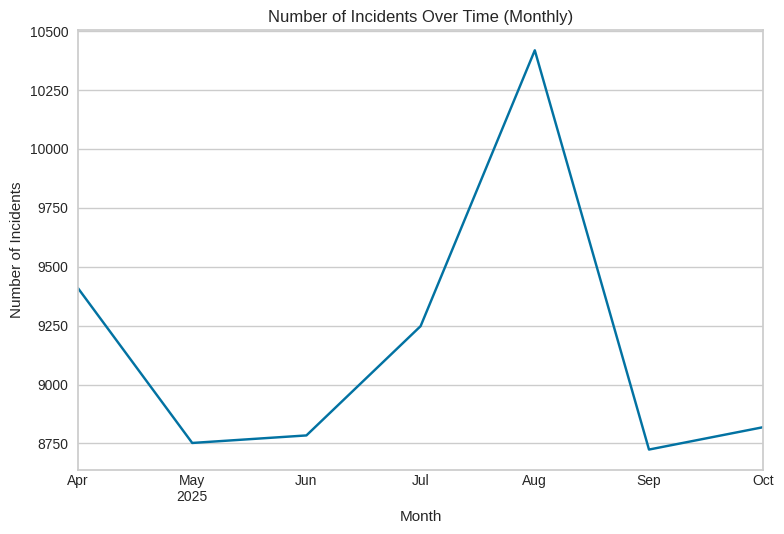

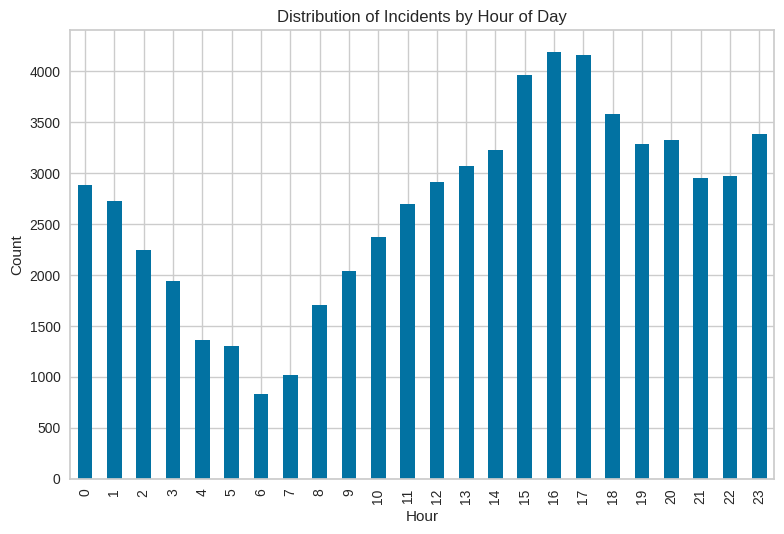

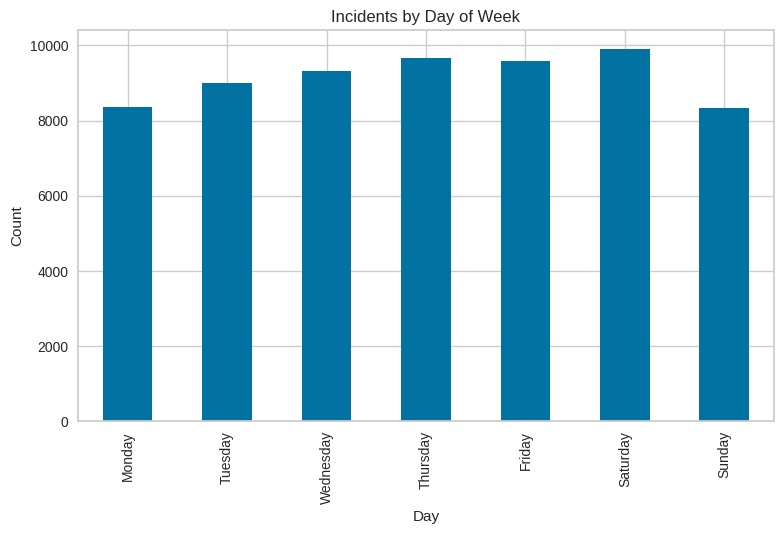

In [10]:
## Time-based EDA

eda_df = df.copy()

# Convert IncidentDate
eda_df["IncidentDate"] = pd.to_datetime(
    eda_df["IncidentDate"], errors="coerce", format="%Y-%m-%d"
)

# Convert IncidentTime and extract hour
eda_df["IncidentTime"] = pd.to_datetime(
    eda_df["IncidentTime"], errors="coerce", format="%H:%M:%S"
)

eda_df["IncidentHour"] = eda_df["IncidentTime"].dt.hour

# Extract date parts
eda_df["IncidentYear"] = eda_df["IncidentDate"].dt.year
eda_df["IncidentMonth"] = eda_df["IncidentDate"].dt.month
eda_df["IncidentDayOfWeek"] = eda_df["IncidentDate"].dt.day_name()

# Monthly Incident Volume
monthly_counts = (
    eda_df
    .dropna(subset=["IncidentDate"])
    .set_index("IncidentDate")
    .resample("ME")["IncidentTime"]
    .count()
)

monthly_counts.plot(kind="line")
plt.title("Number of Incidents Over Time (Monthly)")
plt.xlabel("Month")
plt.ylabel("Number of Incidents")
plt.tight_layout()
plt.show()

# Incidents by Hour of Day
hour_counts = eda_df["IncidentHour"].value_counts().sort_index()

hour_counts.plot(kind="bar")
plt.title("Distribution of Incidents by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Incidents by Day of Week
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

dow_counts = eda_df["IncidentDayOfWeek"].value_counts().reindex(day_order)

dow_counts.plot(kind="bar")
plt.title("Incidents by Day of Week")
plt.xlabel("Day")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

The pattern across months showed a noticeable rise in July, a clear peak in August, and a sharp fall in September. When broken down by hour of the day, incidents were least common around 06:00 and increase progressively until reaching their highest levels around 16:00. The pattern across the week was more balanced, although Saturday showed a slight increase compared with other days. While these temporal trends do not directly explain taser use, they provide useful context on when use-of-force encounters tend to occur.

## 4.2Location based patterns

Number of location columns: 16
Location columns: ['Incident Location: Street/Highway', 'Incident Location: Public Transport', 'Incident Location: Retail Premises', 'Incident Location: Open ground (e.g. park, car park, field)', 'Incident Location: Licensed Premises', 'Incident Location: Sports or Event Stadia', 'Incident Location: Hospital/A&E (non-mental-health setting)', 'Incident Location: Mental Health Setting', 'Incident Location: Police vehicle with prisoner handling cage', 'Incident Location: Police vehicle without prisoner handling cage', 'Incident Location: Dwelling', 'Incident Location: Police station (excluding custody block)', 'Incident Location: Custody Block', 'Incident Location: Ambulance', 'Incident Location: School/College/University', 'Incident Location: Other']


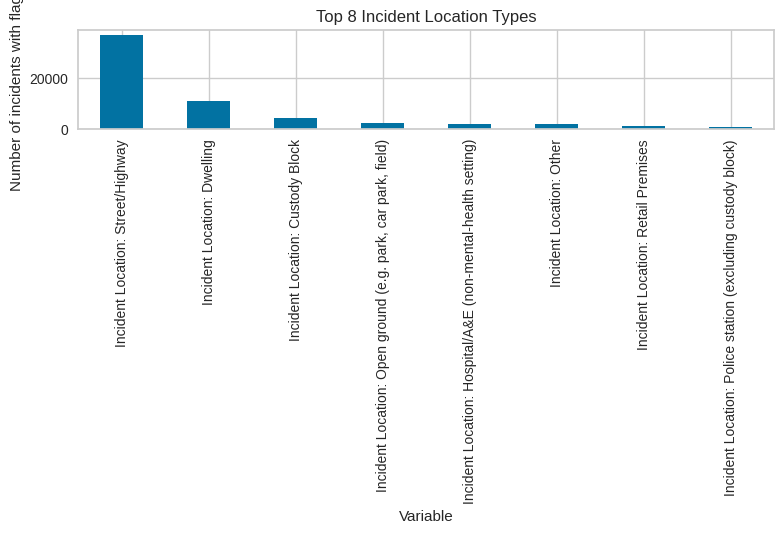

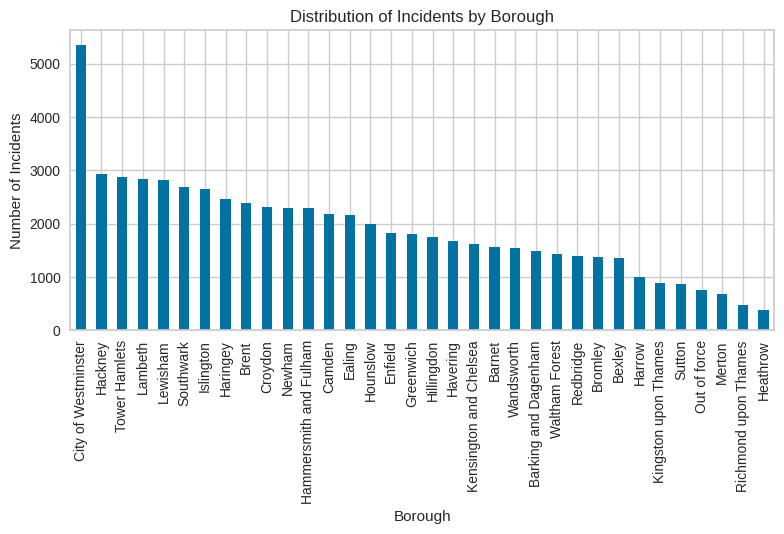

In [11]:
## Location-based EDA

print("Number of location columns:", len(location_cols))
print("Location columns:", location_cols)

# Binary location-type flags (0/1 columns) - where the incident occurred (street, retail, etc.)
if location_cols:
    plot_binary_flag_frequencies(
        eda_df,
        location_cols,
        title="Top 8 Incident Location Types",
        min_count=1,
        top_n=8
    )

# Borough distribution - categorical, so plotted separately
if "Borough" in eda_df.columns:
    borough_counts = (
        eda_df["Borough"]
        .value_counts()
        .sort_values(ascending=False)
    )

    borough_counts.plot(kind="bar")
    plt.title("Distribution of Incidents by Borough")
    plt.xlabel("Borough")
    plt.ylabel("Number of Incidents")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

Streets and highways accounted for the largest share of encounters, followed by dwellings, which together make up much of the recorded use-of-force activity. Examining patterns at the borough level showed that most areas of London had a broadly similar number of incidents, with one notable exception: the City of Westminster recorded substantially more cases than other boroughs. As with the temporal analysis, these patterns help describe the broader environment in which incidents occur but are not directly linked to taser use.

## 4.3Overview of CED Use

Total CED-related columns: 166
Binary Yes/No Taser columns: 156
Example binary Taser columns: ['CED Drawn', 'CED Aimed', 'CED Arced', 'CED Red-Dotted', 'CED Drive Stun', 'CED Angle Drive Stun', 'CED Fired', 'CED Fired 5 Secs Cycle Interrupted', 'CED Fired Repeat Cycle Same Cartridge', 'CED Fired Cycle Extended Beyond 5 Secs']

AnyTaserFlag value counts (0 = no taser, 1 = taser used):
AnyTaserFlag
0    60283
1     3872
Name: count, dtype: int64

Estimated taser use rate: 6.035% of incidents


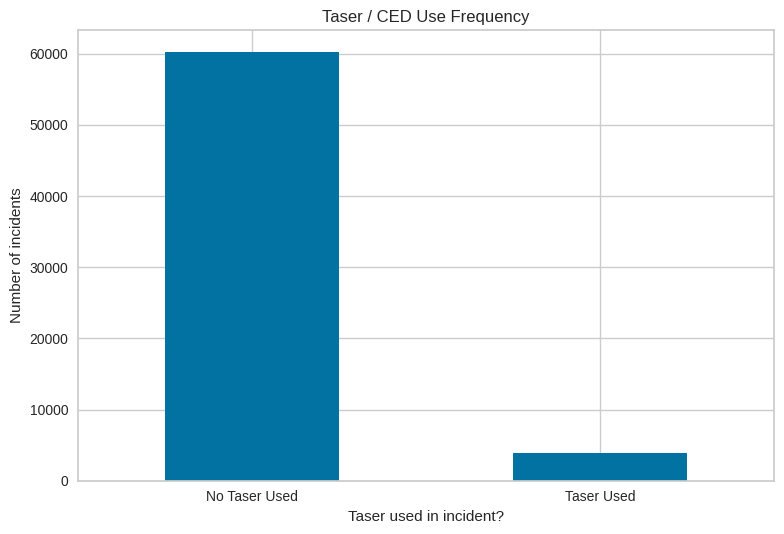

In [12]:
## Taser/CED EDA

da_df = df.copy()

ced_cols = [c for c in eda_df.columns if c.startswith("CED")]

print("Total CED-related columns:", len(ced_cols))

# Keeping only CED columns that are proper Yes/No flags
binary_taser_cols = []
for c in ced_cols:
    vals = eda_df[c].dropna().unique()
    # Convert to strings to be safe
    val_set = set(str(v) for v in vals)
    if val_set.issubset({"Yes", "No"}):
        binary_taser_cols.append(c)

print("Binary Yes/No Taser columns:", len(binary_taser_cols))
print("Example binary Taser columns:", binary_taser_cols[:10])

if binary_taser_cols:
    # Convert Yes/No to 1/0 only for these binary columns
    taser_binary = eda_df[binary_taser_cols].replace({"Yes": 1, "No": 0})
    taser_binary = taser_binary.apply(pd.to_numeric, errors="coerce")

    # AnyTaserFlag = 1 if ANY taser-related action occurred
    eda_df["AnyTaserFlag"] = taser_binary.max(axis=1).fillna(0).astype(int)

    # Basic distribution of taser use
    print("\nAnyTaserFlag value counts (0 = no taser, 1 = taser used):")
    print(eda_df["AnyTaserFlag"].value_counts(dropna=False))

    taser_rate = eda_df["AnyTaserFlag"].mean()
    print(f"\nEstimated taser use rate: {taser_rate:.3%} of incidents")

    # Bar chart of taser vs non-taser incidents
    counts = eda_df["AnyTaserFlag"].value_counts().sort_index()

    if set(counts.index) == {0, 1}:
        counts.index = ["No Taser Used", "Taser Used"]

    counts.plot(kind="bar")
    plt.title("Taser / CED Use Frequency")
    plt.xlabel("Taser used in incident?")
    plt.ylabel("Number of incidents")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

else:
    print("No binary Yes/No Taser/CED columns detected in the dataset.")

A single binary indicator, AnyTaserFlag, was created to capture whether any taser-related action occurred during an incident. This serves as a helpful baseline before exploring how taser use differs across various demographic or situational attributes.

## 4.4Subject characteristics

Subject-related columns:
['AssaultedBySubject', 'SubjectAge', 'SubjectGender', 'SubjectEthnicity', 'PhysicalDisability', 'MentalDisability', 'SubjectInjured', 'SubjectNatureOfInjury', 'SubjectMedOffered', 'SubjectMedProvided']

Subject age columns: ['SubjectAge']
Subject gender columns: ['SubjectGender']
Subject ethnicity columns: ['SubjectEthnicity']
Subject vulnerability columns: ['PhysicalDisability', 'MentalDisability']


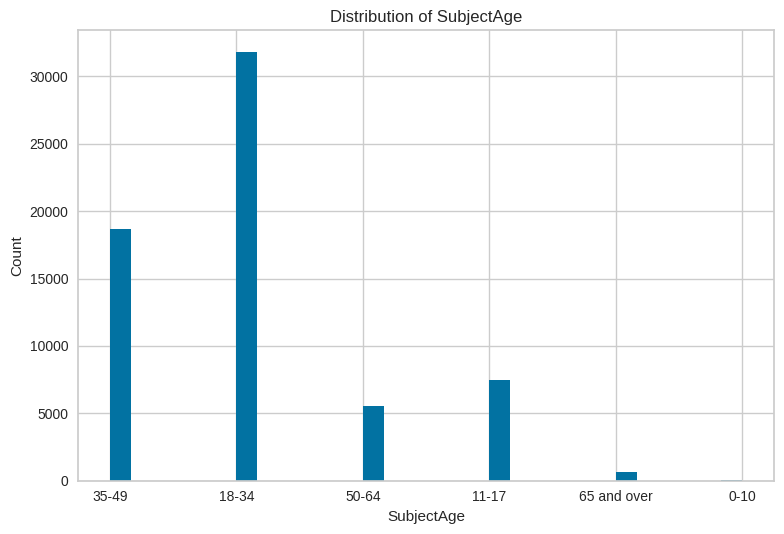

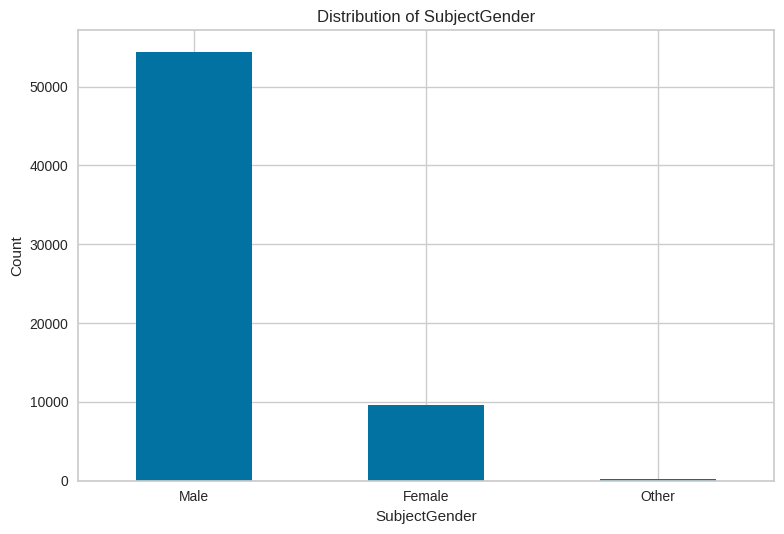

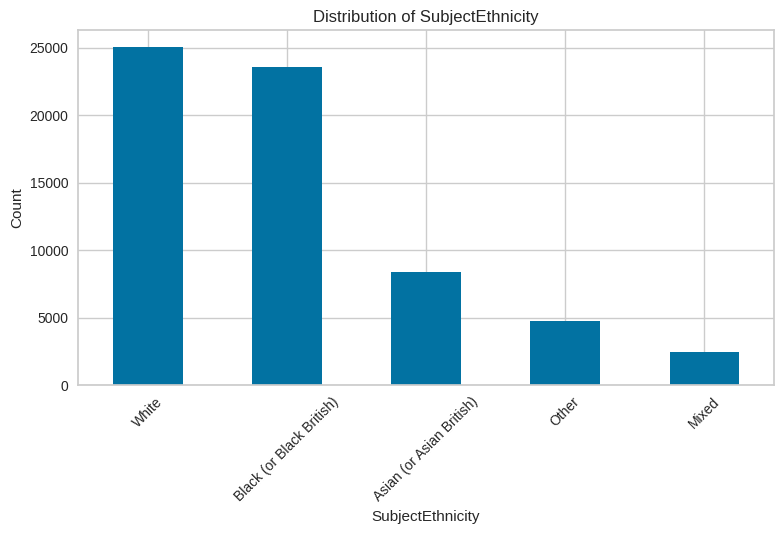

In [13]:
## Subject characteristics EDA

print("Subject-related columns:")
print(subject_cols)

# Try to infer specific groups from column names
subject_age_cols = [c for c in subject_cols if "Age" in c]
subject_gender_cols = [c for c in subject_cols if "Gender" in c or "Sex" in c]
subject_ethnicity_cols = [c for c in subject_cols if "Ethnicity" in c]
subject_vulnerability_cols = [c for c in subject_cols if "Mental" in c or "Disability" in c or "Alcohol" in c or "Drugs" in c]

print("\nSubject age columns:", subject_age_cols)
print("Subject gender columns:", subject_gender_cols)
print("Subject ethnicity columns:", subject_ethnicity_cols)
print("Subject vulnerability columns:", subject_vulnerability_cols)

# Age distributions
for col in subject_age_cols:
    if col in eda_df.columns:
        plot_numeric_distribution(eda_df, col)

# Gender counts
for col in subject_gender_cols:
    if col in eda_df.columns:
        plot_bar_counts(eda_df[col], title=f"Distribution of {col}", rotate_xticks=0)

# Ethnicity counts (top 10)
for col in subject_ethnicity_cols:
    if col in eda_df.columns:
        plot_bar_counts(eda_df[col], title=f"Distribution of {col}", top_n=10, rotate_xticks=45)

# Vulnerability flags (assumed binary / indicator)
binary_vuln_cols = [
    c for c in subject_vulnerability_cols
    if c in eda_df.columns and pd.api.types.is_numeric_dtype(eda_df[c])
]

if binary_vuln_cols:
    plot_binary_flag_frequencies(
        eda_df,
        binary_vuln_cols,
        title="Subject vulnerability / risk flags",
        min_count=1
    )


Age group 18–34 group represents the largest share of subjects, followed by those aged 35–49. Gender patterns were notably uneven, with most incidents involving male subjects, and far fewer female or other gender categories represented. Ethnicity followed a similar structure, with White subjects making up the largest group and Black (or Black British) individuals closely behind.

## 4.5Incident outcomes

Outcome columns:
['Outcome: Made off/escaped', 'Outcome: Arrested', 'Outcome: Hospitalised', 'Outcome: Detained - Mental Health Act', 'Outcome: Fatality', 'Outcome: Other', 'Outcome: No Further Action', 'Outcome: Search conducted', 'Outcome: Serious injury (hospitalised)', 'Outcome: not arrested - satisfactory stop']


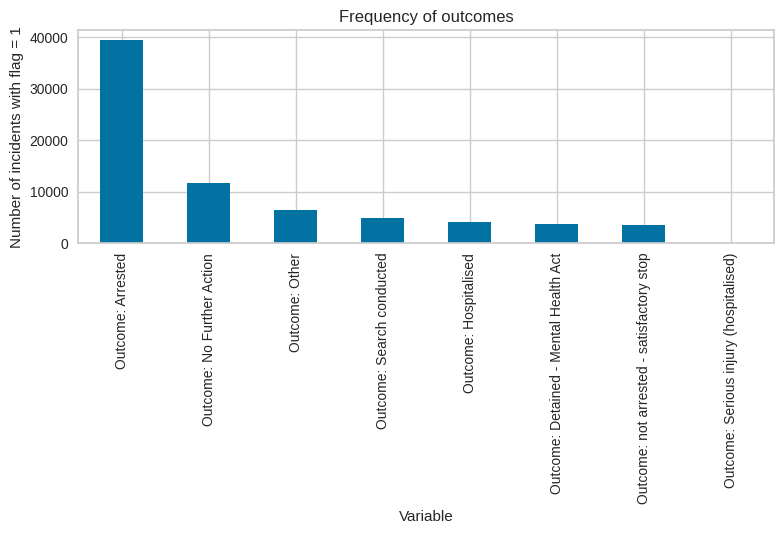

In [14]:
## Outcome variables EDA

print("Outcome columns:")
print(outcome_cols)

if outcome_cols:
    plot_binary_flag_frequencies(
        eda_df,
        outcome_cols,
        title="Frequency of outcomes",
        min_count=1
    )


The overwhelming majority of incidents resulted in an arrest, while other outcomes, such as “no further action”, hospitalisation, or search, were far less common.

## 4.6Taser use across key attributes

Taser use distribution (0 = no taser, 1 = taser used):
AnyTaserFlag
0    60283
1     3872
Name: count, dtype: int64

Taser use by Subject Gender:


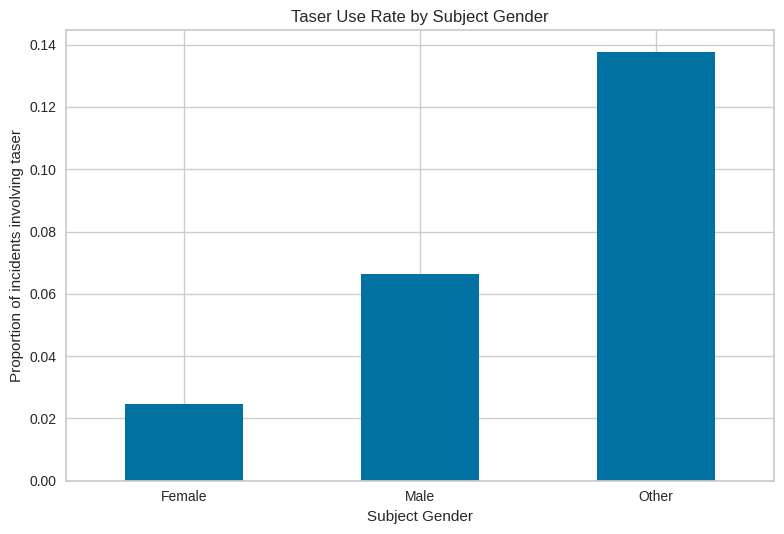


Taser use by Subject Ethnicity:


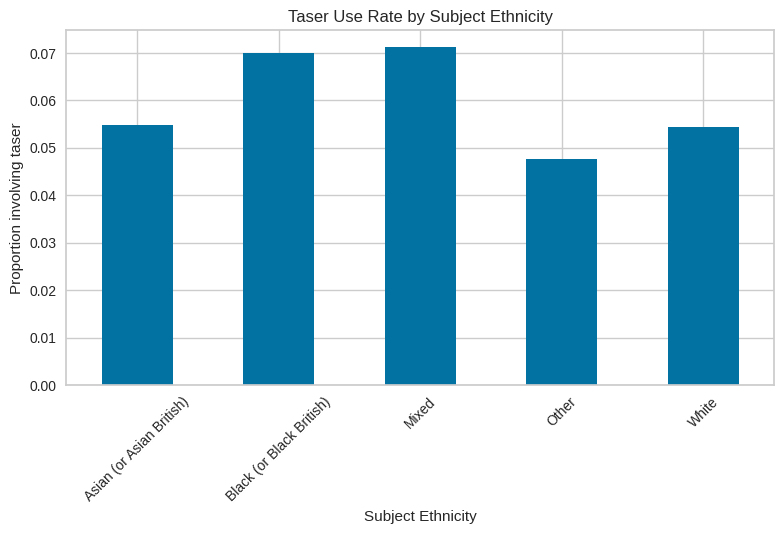


Taser use when Impact Factor: Alcohol = Yes


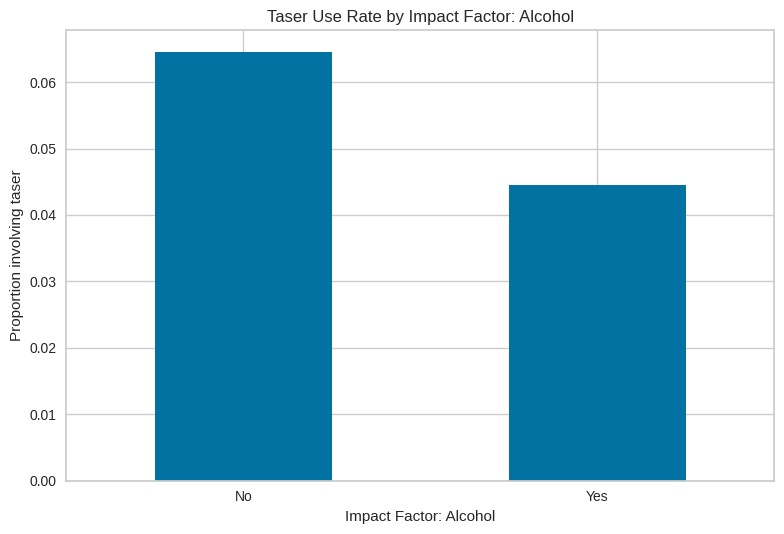


Taser use when Impact Factor: Drugs = Yes


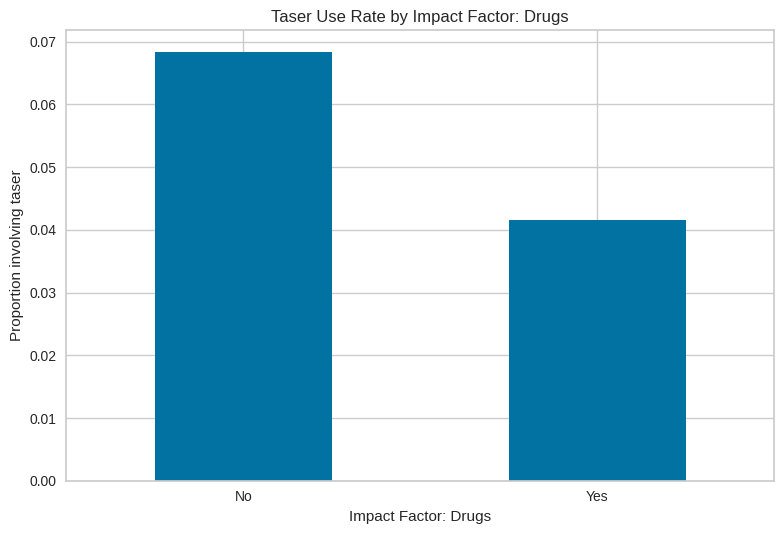


Taser use when Impact Factor: Mental Health = Yes


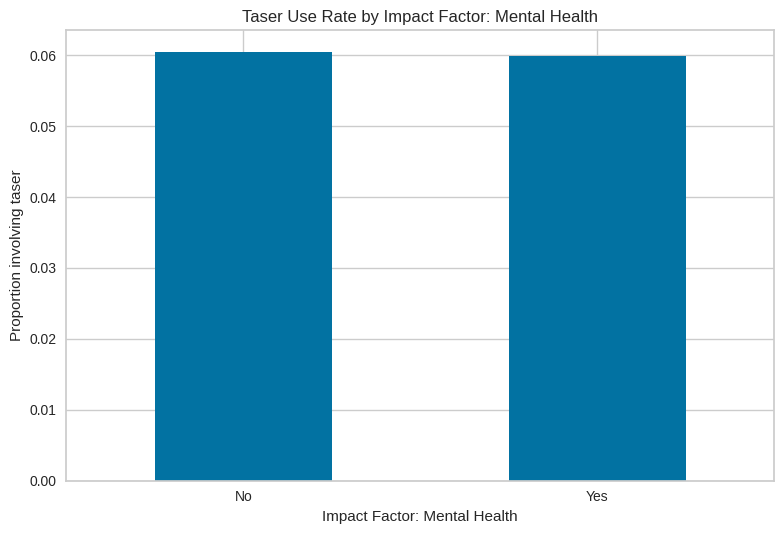


Taser use when Impact Factor: Possesion of a weapon = Yes


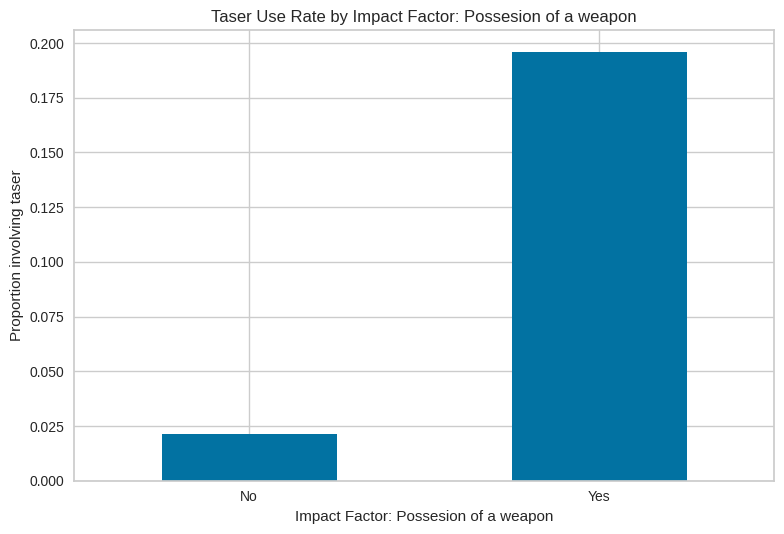


Taser use when Impact Factor: Acute Behavioural Disorder = Yes


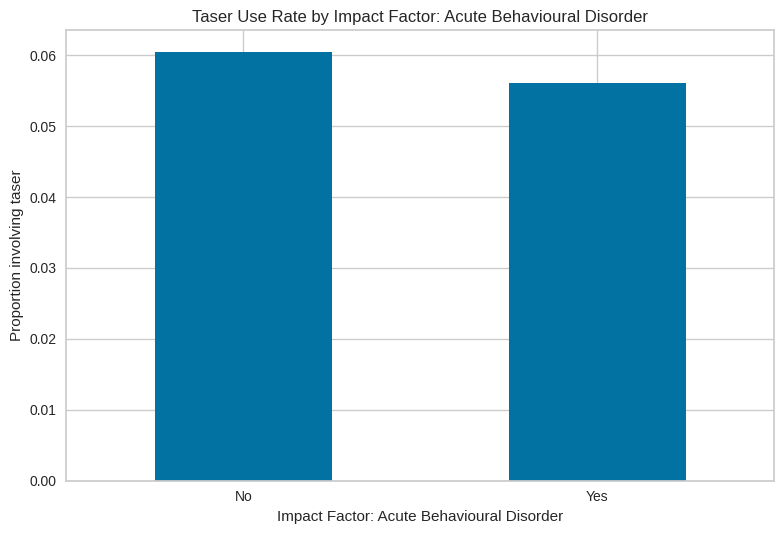


Taser use when AssaultedBySubject = Yes


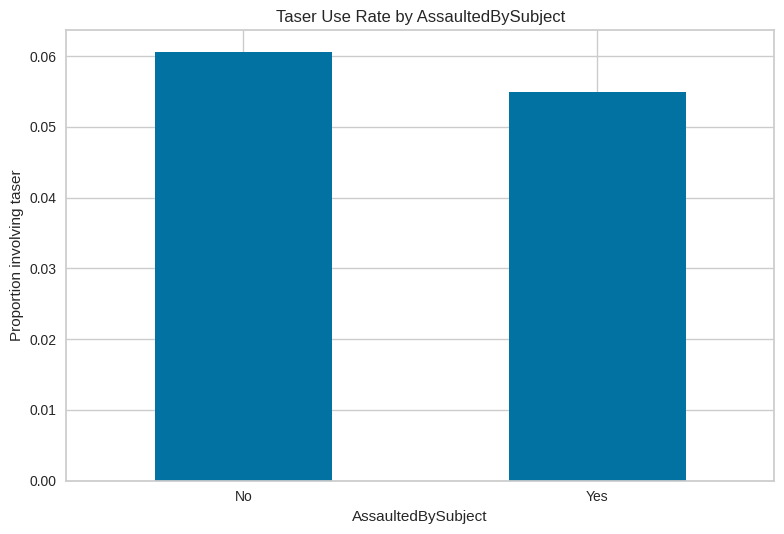


Taser use when ThreatenedWithWeapon = Yes


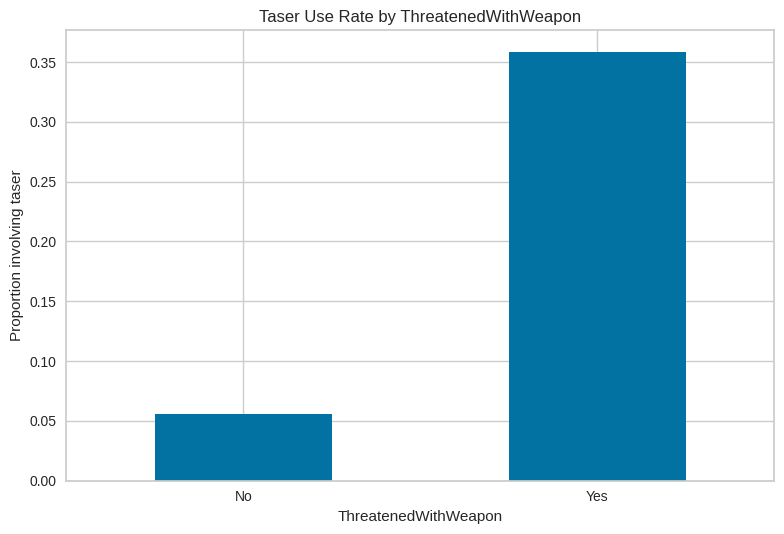

Impact factor columns: 9
['Impact Factor: Possesion of a weapon', 'Impact Factor: Alcohol', 'Impact Factor: Drugs', 'Impact Factor: Mental Health', 'Impact Factor: Prior Knowledge', 'Impact Factor: Size/Gender/Build', 'Impact Factor: Acute Behavioural Disorder', 'Impact Factor: Crowd', 'Impact Factor: Other']

Taser use rate by number of impact factors:
RiskCount
1.0    0.038770
2.0    0.057648
3.0    0.076314
4.0    0.091831
5.0    0.111765
6.0    0.131313
7.0    0.120773
8.0    0.072289
9.0    0.100000
Name: AnyTaserFlag, dtype: float64


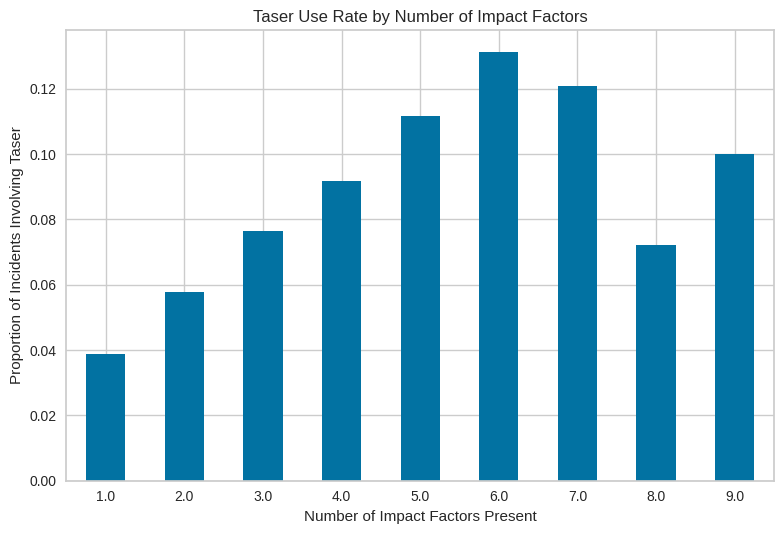

In [15]:
## Relationships: Taser VS Key attributes 
if "AnyTaserFlag" not in eda_df.columns:
    raise ValueError("AnyTaserFlag not found — run Taser EDA section first.")

print("Taser use distribution (0 = no taser, 1 = taser used):")
print(eda_df["AnyTaserFlag"].value_counts(dropna=False))

# Taser vs subject gender
if "SubjectGender" in eda_df.columns:
    print("\nTaser use by Subject Gender:")
    gender_counts = eda_df.groupby("SubjectGender")["AnyTaserFlag"].mean()

    gender_counts.plot(kind="bar")
    plt.title("Taser Use Rate by Subject Gender")
    plt.xlabel("Subject Gender")
    plt.ylabel("Proportion of incidents involving taser")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Taser vs subject ethnicity
if "SubjectEthnicity" in eda_df.columns:
    print("\nTaser use by Subject Ethnicity:")
    ethnicity_counts = eda_df.groupby("SubjectEthnicity")["AnyTaserFlag"].mean()

    ethnicity_counts.plot(kind="bar")
    plt.title("Taser Use Rate by Subject Ethnicity")
    plt.xlabel("Subject Ethnicity")
    plt.ylabel("Proportion involving taser")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Taser vs impact factors 
impact_factors_to_check = [
    "Impact Factor: Alcohol",
    "Impact Factor: Drugs",
    "Impact Factor: Mental Health",
    "Impact Factor: Possesion of a weapon",
    "Impact Factor: Acute Behavioural Disorder",
]

impact_factors_to_check = [c for c in impact_factors_to_check if c in eda_df.columns]

for col in impact_factors_to_check:
    print(f"\nTaser use when {col} = Yes")

    # Convert Yes/No to 1/0
    flag = eda_df[col].replace({"Yes": 1, "No": 0}).astype(float)  

    # Mean taser use when this factor is present vs absent
    means = eda_df.groupby(flag)["AnyTaserFlag"].mean()

    means.index = ["No", "Yes"]  # make labels nicer

    means.plot(kind="bar")
    plt.title(f"Taser Use Rate by {col}")
    plt.xlabel(col)
    plt.ylabel("Proportion involving taser")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Taser vs risk behaviours (assulted by subject & threatened with weapon)
risk_flags = [
    "AssaultedBySubject",
    "ThreatenedWithWeapon"
]

risk_flags = [c for c in risk_flags if c in eda_df.columns]

for col in risk_flags:
    print(f"\nTaser use when {col} = Yes")

    raw = eda_df[col]

    # Create a binary flag:
    # 1 = some kind of risk present
    # 0 = no risk (or missing / blank)
    flag = ((raw.notna()) & (raw != "No")).astype(int)

    # Mean taser use when this risk is present vs absent
    means = eda_df.groupby(flag)["AnyTaserFlag"].mean()

    # Labels
    means.index = ["No", "Yes"]

    means.plot(kind="bar")
    plt.title(f"Taser Use Rate by {col}")
    plt.xlabel(col)
    plt.ylabel("Proportion involving taser")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Taser v number of impact factors

impact_cols = [c for c in eda_df.columns if c.startswith("Impact Factor")]
print("Impact factor columns:", len(impact_cols))
print(impact_cols)

impact_binary = eda_df[impact_cols].replace({"Yes": 1, "No": 0}).astype(float) # Covert Yes/No -> 1/0
eda_df["RiskCount"] = impact_binary.sum(axis=1) # Count number of risk/impact factors present in each incident
risk_taser_rates = eda_df.groupby("RiskCount")["AnyTaserFlag"].mean() # Taser use rate for each RiskCount value

print("\nTaser use rate by number of impact factors:")
print(risk_taser_rates)

# Plot
risk_taser_rates.plot(kind="bar")
plt.title("Taser Use Rate by Number of Impact Factors")
plt.xlabel("Number of Impact Factors Present")
plt.ylabel("Proportion of Incidents Involving Taser")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# A correlation heatmap was considered but ultimately not included because that large number of binary fields produced uninformative patterns. 
# Direct comparisons offered clearer insights for this dataset.

Finally, Taser use was compared across key attributes. Gender-based differences showed higher rates of taser deployment among males and an even higher proportion within the small number of incidents involving “other” gender categories. Ethnic differences were present but more modest. Situational factors revealed stronger contrasts: incidents involving possession of a weapon or threats with a weapon showed noticeably higher taser-use rates, and taser deployment also tended to increase as more impact factors were present.

## 5.Data Cleaning and Data Transformation

## 5.1Missing data

In [16]:
# Iterate through 'data' and determine if each field has empty values (with help of GenAI) https://gemini.google.com/share/8736ed79b7ac
updated_data_dictionary = []

for row in data_dictionary:
    col_name = row[0]
    has_empty = "Empty Values" # Default assumption
    target_cols = []
    
    # Identify which actual columns in df correspond to the dictionary entry
    if col_name in df.columns:
        target_cols = [col_name]
    elif col_name == "Incident Location":
        target_cols = [c for c in df.columns if c.startswith("Incident Location:")]
    elif col_name == "Impact Factor":
        target_cols = [c for c in df.columns if c.startswith("Impact Factor:")]
    elif col_name == "Reason for Force":
        target_cols = [c for c in df.columns if c.startswith("Reason for Force:")]
    elif col_name == "Outcome":
        target_cols = [c for c in df.columns if c.startswith("Outcome:")]
    elif col_name == "Tactic and Effectiveness":
        target_cols = [c for c in df.columns if "Tactic" in c or "Effective" in c]
    elif col_name == "CED Details":
        # Select all CED columns EXCEPT "CED Used"
        target_cols = [c for c in df.columns if c.startswith("CED") and c != "CED Used"]
    
    # Check if ANY of the target columns have missing values (NaN/None)
    if target_cols:
        if df[target_cols].isnull().any().any():
            has_empty = "No empty values"
    else:
        # If column name doesn't match anything in DF (safety check)
        has_empty = "Unknown"

    # Add the result to the row
    updated_data_dictionary.append(row + (has_empty,))

# Create the final DataFrame
dictionary_df = pd.DataFrame(updated_data_dictionary, columns=['Column Name', 'Data Type', 'Description', 'Example', 'Has Empty Values'])

# Display the table
pd.set_option('display.max_colwidth', None)
dictionary_df

,Column Name,Data Type,Description,Example,Has Empty Values
0,IncidentDate,Date,The date on which the incident occurred.,01/01/2021,Empty Values
1,IncidentTime,Time,The specific time of day the incident occurred.,00:30:00,Empty Values
2,Incident Location,String (Boolean: Yes/No),"Type of location, categories: Street/Highway, Public Transport, Retail Premises, Open ground (parks/fields), Licensed Premises, Sports/Event Stadia, Hospital/A&E, Mental Health Setting, Police vehicle (with/without cage), Dwelling, Police station, Custody Block, Ambulance, School/College/University, Other.",Yes,Empty Values
3,Borough,String,The London borough where the incident occurred.,Barnet,Empty Values
4,PrimaryConduct,String,The primary conduct or behavior of the subject.,Compliant,Empty Values
5,AssaultedBySubject,String (Boolean: Yes/No),Indicates if the officer was assaulted by the subject.,No,Empty Values
6,ThreatenedWithWeapon,String (Boolean: Yes/No),Indicates if the officer was threatened with a weapon.,No,No empty values
7,AssaultedWithWeapon,String (Boolean: Yes/No),Indicates if the officer was assaulted with a weapon.,No,No empty values
8,Impact Factor,String (Boolean: Yes/No),"Factors influencing the incident. Categories: Possession of a weapon, Alcohol, Drugs, Mental Health, Prior Knowledge, Size/Gender/Build, Acute Behavioural Disorder, Crowd, Other.",Yes,Empty Values
9,Reason for Force,String (Boolean: Yes/No),"Officer's justification for force. Categories: Protect Self/Public/Subject/Officers, Prevent Offence/Escape/Harm/Self-harm, Secure Evidence, Effect Arrest, Method of Entry, Remove Handcuffs, Stop and Search (various types).",Yes,Empty Values


### 5.2Removing unused columns

In [17]:
# List of columns to keep
columns_to_keep = [
    'IncidentDate', 'IncidentTime', 'Borough', 'PrimaryConduct', 'AssaultedBySubject',
    'Impact Factor: Possesion of a weapon', 'Impact Factor: Alcohol', 'Impact Factor: Drugs',
    'Impact Factor: Mental Health', 'Impact Factor: Prior Knowledge',
    'Impact Factor: Size/Gender/Build', 'Impact Factor: Acute Behavioural Disorder',
    'Impact Factor: Crowd', 'Impact Factor: Other', 'CED Used',
    'SubjectAge', 'SubjectGender', 'SubjectEthnicity',
    'PhysicalDisability', 'MentalDisability',
    'Outcome: Made off/escaped', 'Outcome: Arrested', 'Outcome: Hospitalised',
    'Outcome: Detained - Mental Health Act', 'Outcome: Fatality', 'Outcome: Other',
    'Outcome: No Further Action', 'Outcome: Search conducted',
    'Outcome: Serious injury (hospitalised)', 'Outcome: not arrested - satisfactory stop'
]

# Create a new DataFrame with selected columns
df_model = df[columns_to_keep].copy()

# Some dates might be in different formats, but pandas usually handles standard formats for us
df_model['IncidentDate'] = pd.to_datetime(df_model['IncidentDate'], errors='coerce')

#  Iterate through object columns
for col in df_model.select_dtypes(include=['object']).columns:
    # Strip any whitespace, to prevent having distinct categories due to user entry even though they are the same
    df_model[col] = df_model[col].str.strip()

# Display info to check nulls and types
print(df_model.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64155 entries, 0 to 64154
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   IncidentDate                               64155 non-null  datetime64[ns]
 1   IncidentTime                               64155 non-null  object        
 2   Borough                                    64155 non-null  object        
 3   PrimaryConduct                             64155 non-null  object        
 4   AssaultedBySubject                         64155 non-null  object        
 5   Impact Factor: Possesion of a weapon       64155 non-null  object        
 6   Impact Factor: Alcohol                     64155 non-null  object        
 7   Impact Factor: Drugs                       64155 non-null  object        
 8   Impact Factor: Mental Health               64155 non-null  object        
 9   Impact Factor: Pr

In [18]:
# Checking for cleaned data entries - 64155 rows and 30 columns
df_model.shape

(64155, 30)

## 5.3Data transformation

### 5.3.1Feature engineering for classification

Classification ML algorithms cannot perform calculations on text strings, so we convert "Yes" and "No" to numbers 1 and 0.

In [19]:
# Replacing the binary values. Replacing every "Yes" data entry to 1, and "No" to 0.
# Using 1 and 0 provides the necessary numerical format that allows the model to calculate probabilities and optimize predictions efficiently.
df_model = df_model.replace({'Yes': 1, 'No': 0})

### 5.3.2Preparing target variable

In [20]:
# Check value counts for 'CED Used' (y variable)
print("Value Counts for 'CED Used':")
print(df_model['CED Used'].value_counts())

# Check for empty values in 'CED Used' (y variable)
print("\nNumber of empty values in 'CED Used':")
print(df_model['CED Used'].isnull().sum())

Value Counts for 'CED Used':
CED Used
X2 Taser     3593
X26 Taser     279
Name: count, dtype: int64

Number of empty values in 'CED Used':
60283


"X2 Taser" and "X26 Taser" are 2 different types of tasers used by the Metropolitan Police. As we only want the overall number of times the taser was used, we combine them both by setting the data entry to 1 (British Transport Police, 2025).

In [21]:
# Transforming the "CED Used" column into binary values
# Setting "X2 Taser" and "X26 Taser" data entries to 1. These are the two different types of tasers used, but "X26 Taser" is the older version used by the UK Police. This is also why they are a minority of the general use of tasers
df_model = df_model.replace({'X2 Taser': 1, 'X26 Taser': 1})
# Set empty cells in the "CED used" column to 0. Convering it from float to int for clarity.
# Whenever the cell is empty, it means that the taser wasn't used, so we set the value to 0.
df_model['CED Used'] = df_model['CED Used'].fillna(0).astype(int)

In [22]:
# Now we have a binary outcome whether the taser was used (1) or not (0)
print(df_model['CED Used'].value_counts())

CED Used
0    60283
1     3872
Name: count, dtype: int64


There are 60,283 instances of non-use compared to 3872 instances of CED used. This indicates that CED is rarely used. This shows data imbalancing in outcome value, for which we will deal when training our models.

### 5.3.3One-Hot encoding for categorical variables

Applying One-Hot-Encoding to convert the categorical variables in our cleaned dataset into binary features.

In [23]:
# Selecting all the columns to do one hot encoding. These were deducted while doing the data dictionary in step 3.3 and Data Cleaning in 3.4
categorical_features = ['Borough', 'PrimaryConduct', 'SubjectAge', 'SubjectEthnicity', 'SubjectGender']

# Creating the OneHotEncoder transformer
# sparse_output=False returns a dense array for easier use with many ML models, setting the dtype to int as by default it would be float. It doesn't make a difference in modelling but it's easier to work with for the clarity
ohe_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False, dtype=int)

# Creating the ColumnTransformer
# The list of transformers is a list of tuples: 
# (name, transformer, columns)
preprocessor = ColumnTransformer(
    transformers=[
        # Apply the OneHotEncoder to the list of categorical_features
        ('cat', ohe_transformer, categorical_features)
    ],
    remainder='passthrough' # This keeps all non-specified columns in the final output
)

# Fit and Transform the data
df_transformed_array = preprocessor.fit_transform(df_model)

# Creating the final DataFrame by getting the feature names (Crucial for inspection and use outside a pipeline)

# Get the names of the new, encoded features (e.g., Borough_Croydon)
encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

# Get the names of the remaining (passthrough) features
remaining_features = [col for col in df_model.columns if col not in categorical_features]

# Combining all feature names
all_feature_names = list(encoded_feature_names) + remaining_features

# Creating the final DataFrame
df_transformed = pd.DataFrame(df_transformed_array, columns=all_feature_names)

# Fix data types (convert object columns that look like ints back to ints)
df_transformed = df_transformed.infer_objects()

# Displaying the new transformed table with One-Hot Encoding
df_transformed

,Borough_Barking and Dagenham,Borough_Barnet,Borough_Bexley,Borough_Brent,Borough_Bromley,Borough_Camden,Borough_City of Westminster,Borough_Croydon,Borough_Ealing,Borough_Enfield,Borough_Greenwich,Borough_Hackney,Borough_Hammersmith and Fulham,Borough_Haringey,Borough_Harrow,Borough_Havering,Borough_Heathrow,Borough_Hillingdon,Borough_Hounslow,Borough_Islington,Borough_Kensington and Chelsea,Borough_Kingston upon Thames,Borough_Lambeth,Borough_Lewisham,Borough_Merton,Borough_Newham,Borough_Out of force,Borough_Redbridge,Borough_Richmond upon Thames,Borough_Southwark,Borough_Sutton,Borough_Tower Hamlets,Borough_Waltham Forest,Borough_Wandsworth,PrimaryConduct_Active resistance,PrimaryConduct_Aggressive resistance,PrimaryConduct_Compliant,PrimaryConduct_Passive resistance,PrimaryConduct_Serious or aggravated resistance,PrimaryConduct_Verbal resistance/gestures,SubjectAge_0-10,SubjectAge_11-17,SubjectAge_18-34,SubjectAge_35-49,SubjectAge_50-64,SubjectAge_65 and over,SubjectEthnicity_Asian (or Asian British),SubjectEthnicity_Black (or Black British),SubjectEthnicity_Mixed,SubjectEthnicity_Other,SubjectEthnicity_White,SubjectGender_Female,SubjectGender_Male,SubjectGender_Other,IncidentDate,IncidentTime,AssaultedBySubject,Impact Factor: Possesion of a weapon,Impact Factor: Alcohol,Impact Factor: Drugs,Impact Factor: Mental Health,Impact Factor: Prior Knowledge,Impact Factor: Size/Gender/Build,Impact Factor: Acute Behavioural Disorder,Impact Factor: Crowd,Impact Factor: Other,CED Used,PhysicalDisability,MentalDisability,Outcome: Made off/escaped,Outcome: Arrested,Outcome: Hospitalised,Outcome: Detained - Mental Health Act,Outcome: Fatality,Outcome: Other,Outcome: No Further Action,Outcome: Search conducted,Outcome: Serious injury (hospitalised),Outcome: not arrested - satisfactory stop
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,2025-04-01,00:45:00,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,2025-04-01,00:00:00,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,2025-04-01,00:01:00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,2025-04-01,02:00:00,0,1,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,2025-04-01,01:43:00,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64150,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,2025-10-31,14:00:00,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
64151,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,2025-10-31,16:05:00,0,0,0,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
64152,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,2025-10-31,14:22:00,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
64153,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,2025-10-31,14:45:00,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


### 5.3.4Final transformation

In [24]:
# To keep the layout in a similar format as for the initial dataset we do some reordering for consistency and clarity purposes.
# Doing some reordering for clearer layout of the dataset.

# Defining the first shown columns
cols_at_start = ['IncidentDate', 'IncidentTime', 'CED Used']

# Getting the rest of the columns (preserving their current order)
cols_rest = [col for col in df_transformed.columns if col not in cols_at_start]

# Concatenate the lists
new_column_order = cols_at_start + cols_rest

# Reorder the DataFrame
df_transformed_ordered = df_transformed[new_column_order]
# Displaying the new ordered transformed table with One-Hot Encoding 
df_transformed_ordered

,IncidentDate,IncidentTime,CED Used,Borough_Barking and Dagenham,Borough_Barnet,Borough_Bexley,Borough_Brent,Borough_Bromley,Borough_Camden,Borough_City of Westminster,Borough_Croydon,Borough_Ealing,Borough_Enfield,Borough_Greenwich,Borough_Hackney,Borough_Hammersmith and Fulham,Borough_Haringey,Borough_Harrow,Borough_Havering,Borough_Heathrow,Borough_Hillingdon,Borough_Hounslow,Borough_Islington,Borough_Kensington and Chelsea,Borough_Kingston upon Thames,Borough_Lambeth,Borough_Lewisham,Borough_Merton,Borough_Newham,Borough_Out of force,Borough_Redbridge,Borough_Richmond upon Thames,Borough_Southwark,Borough_Sutton,Borough_Tower Hamlets,Borough_Waltham Forest,Borough_Wandsworth,PrimaryConduct_Active resistance,PrimaryConduct_Aggressive resistance,PrimaryConduct_Compliant,PrimaryConduct_Passive resistance,PrimaryConduct_Serious or aggravated resistance,PrimaryConduct_Verbal resistance/gestures,SubjectAge_0-10,SubjectAge_11-17,SubjectAge_18-34,SubjectAge_35-49,SubjectAge_50-64,SubjectAge_65 and over,SubjectEthnicity_Asian (or Asian British),SubjectEthnicity_Black (or Black British),SubjectEthnicity_Mixed,SubjectEthnicity_Other,SubjectEthnicity_White,SubjectGender_Female,SubjectGender_Male,SubjectGender_Other,AssaultedBySubject,Impact Factor: Possesion of a weapon,Impact Factor: Alcohol,Impact Factor: Drugs,Impact Factor: Mental Health,Impact Factor: Prior Knowledge,Impact Factor: Size/Gender/Build,Impact Factor: Acute Behavioural Disorder,Impact Factor: Crowd,Impact Factor: Other,PhysicalDisability,MentalDisability,Outcome: Made off/escaped,Outcome: Arrested,Outcome: Hospitalised,Outcome: Detained - Mental Health Act,Outcome: Fatality,Outcome: Other,Outcome: No Further Action,Outcome: Search conducted,Outcome: Serious injury (hospitalised),Outcome: not arrested - satisfactory stop
0,2025-04-01,00:45:00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,2025-04-01,00:00:00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,2025-04-01,00:01:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,2025-04-01,02:00:00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,2025-04-01,01:43:00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64150,2025-10-31,14:00:00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
64151,2025-10-31,16:05:00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
64152,2025-10-31,14:22:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
64153,2025-10-31,14:45:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [25]:
# As Deepflow doesn't allow for looking at the Excel files in .xlxs format we create the new preprocessed dataset in the .csv format
# No need to index for modelling. Creating a CSV file with OneHotEncoded categories ready for ML models.
df_transformed_ordered.to_csv('MPS_Use_of_Force_Final_Transformed.csv', index=False)

# 6.Prediction Models

The predictor (X) variables used to predict use of CED were all variables relating to 'Primary Conduct', 'Impact Factors'(excluding “Other”), 'Subject Age', 'Physical Disability' and 'Mental Disability'. The data used for models was split on 80(train):20(test) ratio. All models were initially trained using default hyperparameters, as per the brief instructions. However, due to data set imbalance of taser use, the results generated by each of the three models were similar and uninformative. To address this, we retrained the models by adding hyperparameters to balance the weight of the minority class.

In [26]:
#Importing the dataset with cleaned, transformed data
df_model = pd.read_csv("MPS_Use_of_Force_Final_Transformed.csv")
df_model

,IncidentDate,IncidentTime,CED Used,Borough_Barking and Dagenham,Borough_Barnet,Borough_Bexley,Borough_Brent,Borough_Bromley,Borough_Camden,Borough_City of Westminster,Borough_Croydon,Borough_Ealing,Borough_Enfield,Borough_Greenwich,Borough_Hackney,Borough_Hammersmith and Fulham,Borough_Haringey,Borough_Harrow,Borough_Havering,Borough_Heathrow,Borough_Hillingdon,Borough_Hounslow,Borough_Islington,Borough_Kensington and Chelsea,Borough_Kingston upon Thames,Borough_Lambeth,Borough_Lewisham,Borough_Merton,Borough_Newham,Borough_Out of force,Borough_Redbridge,Borough_Richmond upon Thames,Borough_Southwark,Borough_Sutton,Borough_Tower Hamlets,Borough_Waltham Forest,Borough_Wandsworth,PrimaryConduct_Active resistance,PrimaryConduct_Aggressive resistance,PrimaryConduct_Compliant,PrimaryConduct_Passive resistance,PrimaryConduct_Serious or aggravated resistance,PrimaryConduct_Verbal resistance/gestures,SubjectAge_0-10,SubjectAge_11-17,SubjectAge_18-34,SubjectAge_35-49,SubjectAge_50-64,SubjectAge_65 and over,SubjectEthnicity_Asian (or Asian British),SubjectEthnicity_Black (or Black British),SubjectEthnicity_Mixed,SubjectEthnicity_Other,SubjectEthnicity_White,SubjectGender_Female,SubjectGender_Male,SubjectGender_Other,AssaultedBySubject,Impact Factor: Possesion of a weapon,Impact Factor: Alcohol,Impact Factor: Drugs,Impact Factor: Mental Health,Impact Factor: Prior Knowledge,Impact Factor: Size/Gender/Build,Impact Factor: Acute Behavioural Disorder,Impact Factor: Crowd,Impact Factor: Other,PhysicalDisability,MentalDisability,Outcome: Made off/escaped,Outcome: Arrested,Outcome: Hospitalised,Outcome: Detained - Mental Health Act,Outcome: Fatality,Outcome: Other,Outcome: No Further Action,Outcome: Search conducted,Outcome: Serious injury (hospitalised),Outcome: not arrested - satisfactory stop
0,2025-04-01,00:45:00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,2025-04-01,00:00:00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,2025-04-01,00:01:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,2025-04-01,02:00:00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,2025-04-01,01:43:00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64150,2025-10-31,14:00:00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
64151,2025-10-31,16:05:00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
64152,2025-10-31,14:22:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
64153,2025-10-31,14:45:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


## 6.1Deselecting unused variables

In [27]:
# The following variables that were dropped do not relate to the characteristics or conduct of the subject.
# #Dropping columns that will not be used in the model

# List of columns to drop manually
manual_drop = ["IncidentDate", "IncidentTime", "Outcome: Other", "Outcome: Made off/escaped", 
               "Outcome: Arrested", "Outcome: Hospitalised", "Outcome: Detained - Mental Health Act",
               "Outcome: Fatality", "Outcome: No Further Action", "Outcome: Search conducted", 
               "Outcome: Serious injury (hospitalised)", "Outcome: not arrested - satisfactory stop", 
               "Impact Factor: Other"]

# The outcome variables happen after the taser use

# Combine with columns that contain "Borough"
cols_to_drop = manual_drop + [col for col in df_model.columns if "Borough" in col]

# Drop all selected columns
df_model = df_model.drop(columns=cols_to_drop)

df_model

,CED Used,PrimaryConduct_Active resistance,PrimaryConduct_Aggressive resistance,PrimaryConduct_Compliant,PrimaryConduct_Passive resistance,PrimaryConduct_Serious or aggravated resistance,PrimaryConduct_Verbal resistance/gestures,SubjectAge_0-10,SubjectAge_11-17,SubjectAge_18-34,SubjectAge_35-49,SubjectAge_50-64,SubjectAge_65 and over,SubjectEthnicity_Asian (or Asian British),SubjectEthnicity_Black (or Black British),SubjectEthnicity_Mixed,SubjectEthnicity_Other,SubjectEthnicity_White,SubjectGender_Female,SubjectGender_Male,SubjectGender_Other,AssaultedBySubject,Impact Factor: Possesion of a weapon,Impact Factor: Alcohol,Impact Factor: Drugs,Impact Factor: Mental Health,Impact Factor: Prior Knowledge,Impact Factor: Size/Gender/Build,Impact Factor: Acute Behavioural Disorder,Impact Factor: Crowd,PhysicalDisability,MentalDisability
0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64150,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
64151,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0,0,1
64152,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0
64153,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0


## 6.2Train/test split

In [28]:
#Setting CED Used (whether taser was used) as a target variable y
y = df_model["CED Used"]

#Using all other columns as predictor variables X
X = df_model.drop(columns = ["CED Used"])

#Splitting the dataset into a training set (for the model to learn from) and a test set (for evaluation), so that training set will contain 80% of data and test set will contain 20% of data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

## 6.3Training the unbalanced models

Training the models using the default hyperparameters

### 6.3.1Unbalanced: Decision Tree Model

In [29]:
#Creating a decision tree classifier object 
dtc = DecisionTreeClassifier()

#Training the classifier using the training data
dtc.fit(X_train, y_train)

#Creating predictions for the test set using the trained classifier 
y_pred_tree = dtc.predict(X_test)

# Get predicted probabilities
y_prob_tree = dtc.predict_proba(X_test)[:, 1]   # probability of class 1 (CED used)

### 6.3.2Unbalanced: Random Forest Model

In [30]:
# Random forest with default paramters

rf_model_0 = RandomForestClassifier(random_state=42)

rf_model_0.fit(X_train, y_train)

y_pred_forest_0 = rf_model_0.predict(X_test)

### 6.3.3Unbalanced: XGBoost Model

In [31]:
# XGBoost with default parameters
xgb_model_default = xgb.XGBClassifier(random_state = 42)

xgb_model_default.fit(X_train, y_train)

y_pred_xgb_default = xgb_model_default.predict(X_test)

## 6.4Evaluating the Unbalanced models

The confusion matrices of the 3 unbalanced models demonstrate that they successfully predict true negatives (>98%), however, in more than 92% of cases when the taser was used, the models predict it was not (false negatives). The models also fail to correctly predict taser use (true positives) <= 8%. The confusion matrices highlight the models' poor performance in correctly identifying the minority (class 1) and their strong bias towards predicting 0, leading to high accuracy scores (>0.93).

In [32]:
#Evaluating the model 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree))
print("Recall   :", recall_score(y_test, y_pred_tree))
print("F1 Score :", f1_score(y_test, y_pred_tree))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob_tree))
print("Classification report:\n\n", metrics.classification_report(y_test, y_pred_tree))


Accuracy: 0.9301691216584833
Precision: 0.25
Recall   : 0.07881136950904392
F1 Score : 0.11984282907662082
ROC-AUC  : 0.6924684728590016
Classification report:

               precision    recall  f1-score   support

           0       0.94      0.98      0.96     12057
           1       0.25      0.08      0.12       774

    accuracy                           0.93     12831
   macro avg       0.60      0.53      0.54     12831
weighted avg       0.90      0.93      0.91     12831



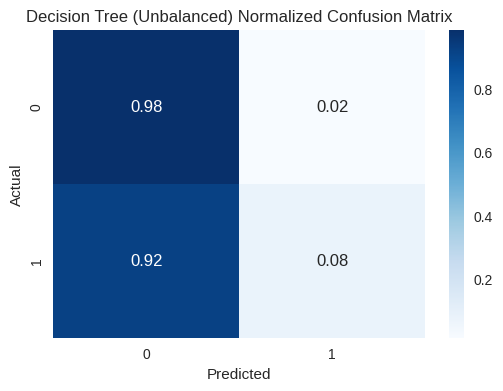

In [33]:
#Visualising the confusion matrix as a heatmap
#Converting rows to percentages
cm_norm_tree = confusion_matrix(y_test, y_pred_tree, normalize='true')

#Plotting the visualisation 
plt.figure(figsize=(6,4))
sns.heatmap(cm_norm_tree, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree (Unbalanced) Normalized Confusion Matrix')
plt.show()

In [34]:
# Evaluating the  model

# Predict probabilities for ROC-AUC
y_prob_forest_0 = rf_model_0.predict_proba(X_test)[:, 1]

print("Accuracy :", accuracy_score(y_test, y_pred_forest_0))
print("Precision:", precision_score(y_test, y_pred_forest_0))
print("Recall   :", recall_score(y_test, y_pred_forest_0))
print("F1 Score :", f1_score(y_test, y_pred_forest_0))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob_forest_0))

print("\nClassification Report:\n")
print(metrics.classification_report(y_test, y_pred_forest_0))

Accuracy : 0.933520380328891
Precision: 0.26900584795321636
Recall   : 0.059431524547803614
F1 Score : 0.09735449735449736
ROC-AUC  : 0.7702907314288139

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     12057
           1       0.27      0.06      0.10       774

    accuracy                           0.93     12831
   macro avg       0.61      0.52      0.53     12831
weighted avg       0.90      0.93      0.91     12831



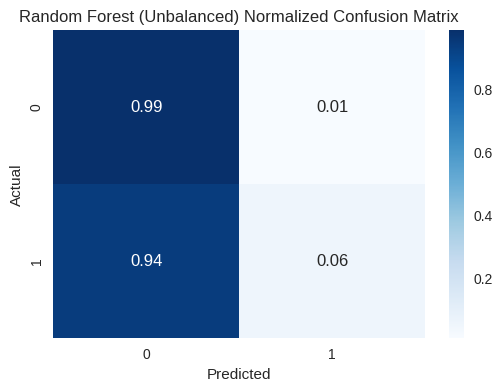

In [35]:
cm_forest_0 = confusion_matrix(y_test, y_pred_forest_0, normalize='true')

plt.figure(figsize=(6,4))
sns.heatmap(cm_forest_0, annot=True, cmap="Blues", fmt=".2f")
plt.title("Random Forest (Unbalanced) Normalized Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [36]:
# Evaluating the model 
y_prob_xgb_default = xgb_model_default.predict_proba(X_test)[:, 1]

print("Accuracy :", accuracy_score(y_test, y_pred_xgb_default))
print("Precision:", precision_score(y_test, y_pred_xgb_default))
print("Recall   :", recall_score(y_test, y_pred_xgb_default))
print("F1 Score :", f1_score(y_test, y_pred_xgb_default))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob_xgb_default))

print("Classification report:\n\n", metrics.classification_report(y_test, y_pred_xgb_default))

Accuracy : 0.9386641727067259
Precision: 0.3898305084745763
Recall   : 0.029715762273901807
F1 Score : 0.055222088835534214
ROC-AUC  : 0.8194550797578856
Classification report:

               precision    recall  f1-score   support

           0       0.94      1.00      0.97     12057
           1       0.39      0.03      0.06       774

    accuracy                           0.94     12831
   macro avg       0.67      0.51      0.51     12831
weighted avg       0.91      0.94      0.91     12831



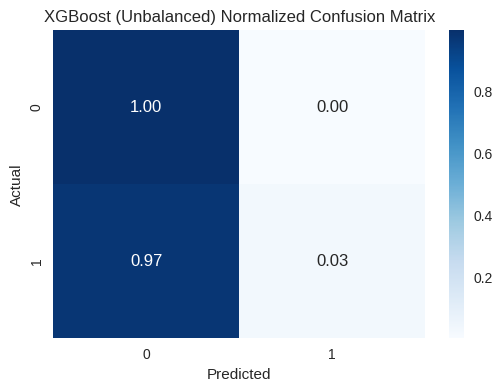

In [37]:
cm_xgb_default = confusion_matrix(y_test, y_pred_xgb_default, normalize='true')

plt.figure(figsize=(6,4))
sns.heatmap(cm_xgb_default, annot=True, cmap="Blues", fmt=".2f")
plt.title("XGBoost (Unbalanced) Normalized Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 6.5Re-training the models

As the models perform poorly in terms of identifying and predicting the minority class (taser used), we decided to re-train the models by adding hyperparameters to balance the class weight, which should help compensate for the class imbalance by assigning more weight to errors made on the minority class 1.

### 6.5.1Balanced: Decision Tree

In [38]:
#Creating a decision tree classifier object, this time using the hyperparameter to balance the class weights. 
dtc_balanced = DecisionTreeClassifier(random_state = 42, class_weight = "balanced")

#Training the classifier using the training data
dtc_balanced.fit(X_train, y_train)

#Creating predictions for the test set using the trained classifier 
y_pred_tree_balanced = dtc_balanced.predict(X_test)

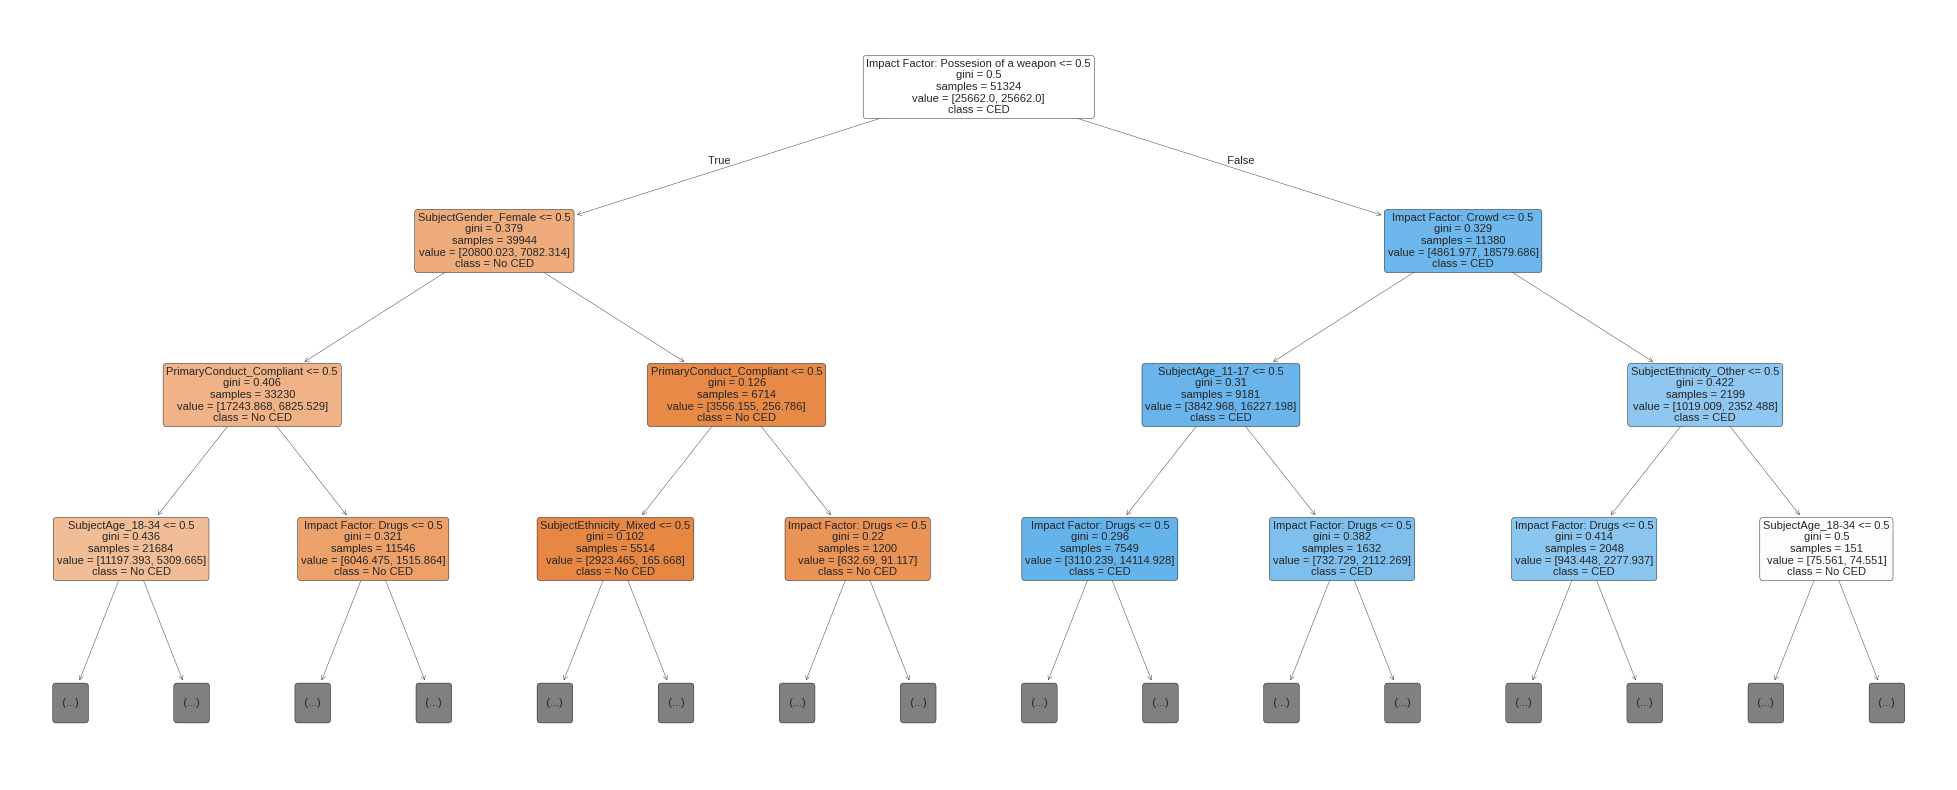

In [39]:
#Visualising the first three levels of the decision tree
plt.figure(figsize=(25, 10))
plot_tree(dtc_balanced,
          feature_names=X.columns,
          class_names=["No CED", "CED"],
          filled=True,
          rounded=True,
          max_depth=3,  
          fontsize=8)
plt.show()

### 6.5.2Evaluating the Balanced Decision Tree

In [40]:
# Predict probabilities for ROC-AUC
y_prob_tree_balanced = dtc_balanced.predict_proba(X_test)[:, 1]

#Evaluating the model 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree_balanced))
print("Precision:", precision_score(y_test, y_pred_tree_balanced))
print("Recall   :", recall_score(y_test, y_pred_tree_balanced))
print("F1 Score :", f1_score(y_test, y_pred_tree_balanced))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob_tree_balanced))

print("Classification report:\n\n", metrics.classification_report(y_test, y_pred_tree_balanced))


Accuracy: 0.7817785051827605
Precision: 0.15331964407939766
Recall   : 0.5788113695090439
F1 Score : 0.24242424242424243
ROC-AUC  : 0.6911379603215476
Classification report:

               precision    recall  f1-score   support

           0       0.97      0.79      0.87     12057
           1       0.15      0.58      0.24       774

    accuracy                           0.78     12831
   macro avg       0.56      0.69      0.56     12831
weighted avg       0.92      0.78      0.83     12831



The re-trained model has an accuracy score of 0.781, which is lower than the default Decision Tree model which had an accuracy score of 0.93. This accuracy was however misleading as the model performed very poorly in terms of correctly identifying class 1 cases. The re-trained model still predicts class 0 cases (precision: 0.97) more precisely than it predicts class 1 (precision: 0.15). There is a substantial improvement in class 1 recall (0.08 in the default model vs 0.58 in the re-trained model).

Confusion matrix:
 [[9583 2474]
 [ 326  448]]


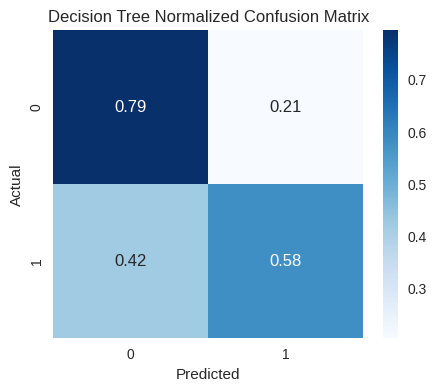

In [41]:
# Confusion Matrix
print("Confusion matrix:\n",metrics.confusion_matrix(y_test, y_pred_tree_balanced))

#Visualising the confusion matrix as a heatmap
#Converting rows to percentages
cm_norm_tree_balanced = confusion_matrix(y_test, y_pred_tree_balanced, normalize='true')

#Plotting the visualisation 
plt.figure(figsize=(5,4))
sns.heatmap(cm_norm_tree_balanced, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Normalized Confusion Matrix')
plt.show()

The confusion matrix of the re-trained model demonstrates the substantial improvement following the balancing of class weights when training the model. 79% of true class 0 (taser not used) cases are correctly identified (true negatives) and 58% of true class 1 cases are correctly identified (true positives).

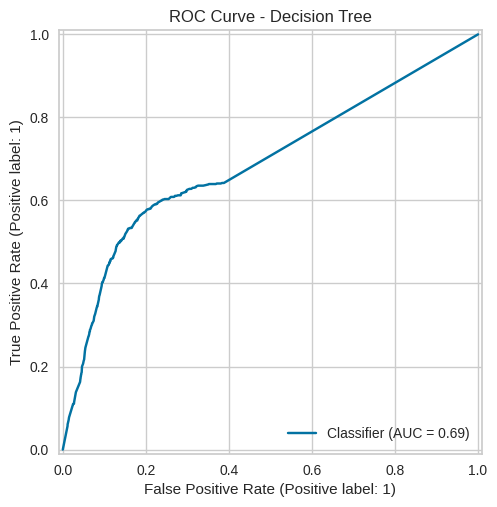

In [42]:
# Get predicted probabilities
y_prob_tree_balanced = dtc_balanced.predict_proba(X_test)[:, 1]   # probability of class 1 (CED used)

# Plot ROC curve
RocCurveDisplay.from_predictions(y_test, y_prob_tree_balanced)
plt.title("ROC Curve - Decision Tree")
plt.show()

The ROC curve's flattening in the top part of the graph demonstrates that the model performs more poorly for class 1 cases than for class 0 cases. The area under the curve of 0.69 demonstrates the model's moderate capabiility in correctly separating positive and negative cases.

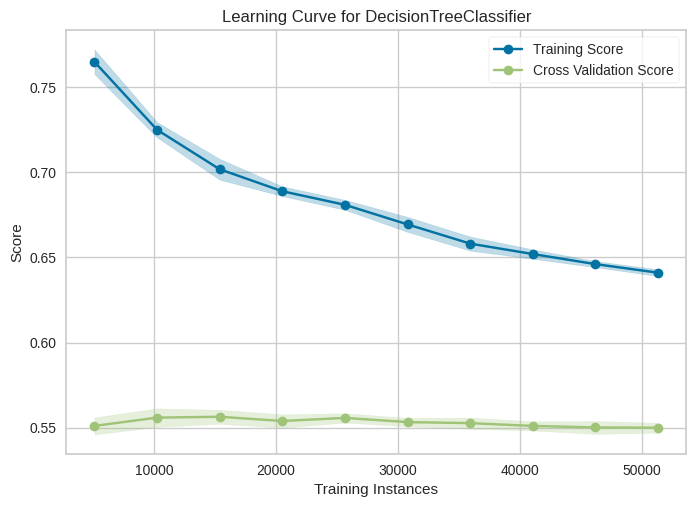

<Axes: title={'center': 'Learning Curve for DecisionTreeClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [43]:
# Plotting a learning curve to see how well the model learn from the training data
clf_tree = DecisionTreeClassifier(
    class_weight="balanced",
    random_state=42
)

# F1 macro score is used as it 
viz = LearningCurve(
    clf_tree,
    scoring='f1_macro',   
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5
)

viz.fit(X, y)
viz.show()

The learning curve shows the model is underfitting.

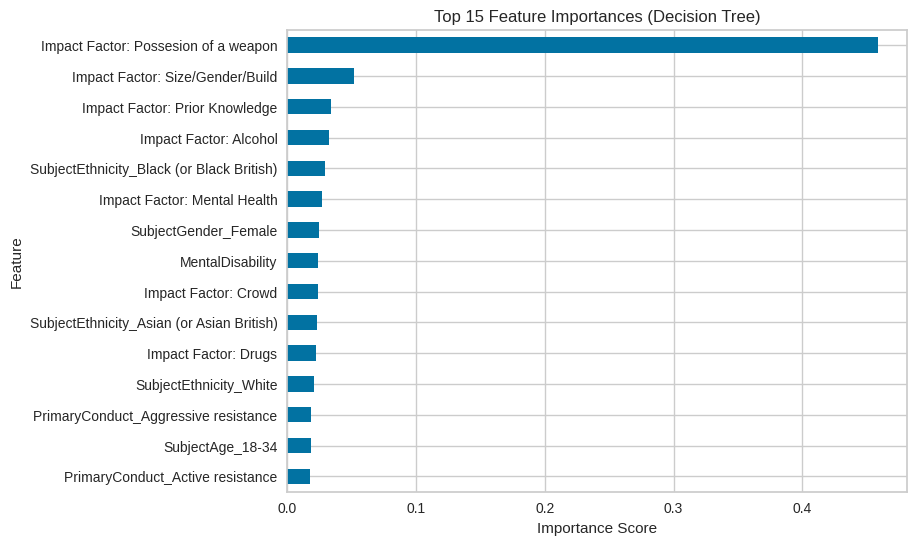

In [44]:
##Finding the main predictors in the decision tree model 

# Extract importance scores
importances_tree = pd.Series(dtc_balanced.feature_importances_, index=X.columns)

# Sort from most important to least
importances_tree = importances_tree.sort_values(ascending=False)

# Plot top 15
plt.figure(figsize=(8, 6))
importances_tree.head(15).plot(kind='barh')
plt.title("Top 15 Feature Importances (Decision Tree)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # Most important at top
plt.show()


The feature importance visualisation demonstrates the most significant predictor of taser use in the model is the possession of weapon. The following predictiors are substantially less significant in predicting the use of taser.

## 6.5.3Balanced: Random Forest model

The confusion matrix for using default hyperparameters shows that the false negatives are too high (0.94) and the true positive detetction is too small (0.06). Hence, to have a more insightful analysis, we will tune the class_weights to 'balanced' before expanding on a more detailed analysis.

In [45]:
# Building the random forest model using the same split data from the decision tree model
rf_model = RandomForestClassifier(random_state = 42, class_weight = 'balanced')

# Training the classifier using training data
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### 6.5.4Evaluating the Balanced Random Forest

In [46]:
# Using the trained data to predict the Y class label
y_pred_forest = rf_model.predict(X_test)

# Predict probabilities for ROC-AUC
y_prob_forest = rf_model.predict_proba(X_test)[:, 1]



print("Accuracy :", accuracy_score(y_test, y_pred_forest))
print("Precision:", precision_score(y_test, y_pred_forest))
print("Recall   :", recall_score(y_test, y_pred_forest))
print("F1 Score :", f1_score(y_test, y_pred_forest))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob_forest))

print("\nClassification Report:\n")
print(metrics.classification_report(y_test, y_pred_forest))


Accuracy : 0.8250331229054634
Precision: 0.1741249446167479
Recall   : 0.5077519379844961
F1 Score : 0.25932035631804684
ROC-AUC  : 0.742902950862816

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.85      0.90     12057
           1       0.17      0.51      0.26       774

    accuracy                           0.83     12831
   macro avg       0.57      0.68      0.58     12831
weighted avg       0.92      0.83      0.86     12831



The balanced random forest model yields an accuracy score of about 82.5%. It predicted well (precision: 0.96; recall: 0.85) in Class 0, and increased performance in predicting Class 1 compared to default parameters, though it still has poor performance (precision: 0.17; recall:0.51).

The F1 score of 0.26 also indicates that the random forest only correctly predicted a small fraction of the Taser deployment incidents.

Confusion matrix:
 [[10193  1864]
 [  381   393]]


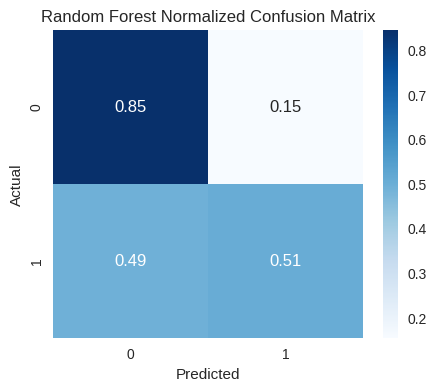

In [47]:
# Confusion Matrix
print("Confusion matrix:\n",metrics.confusion_matrix(y_test, y_pred_forest))

cm_forest = confusion_matrix(y_test, y_pred_forest, normalize='true')

plt.figure(figsize=(5,4))
sns.heatmap(cm_forest, annot=True, cmap="Blues", fmt=".2f")
plt.title("Random Forest Normalized Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


The confusion matrix plot for the random forest model illustrates that the model correctly predicts the majority of incidents where a Taser was not deployed (true negatives), but only accurately identify 51% of the incidents where a Taser was used.

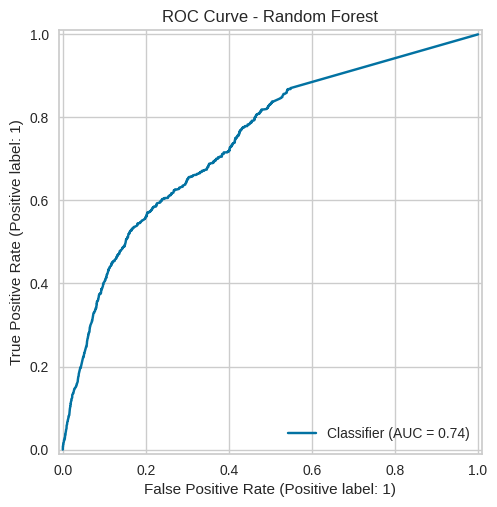

In [48]:
# ROC curve to evaluate the random forest's performance based on the sensitivity level of true positive and false positive
RocCurveDisplay.from_predictions(y_test, y_prob_forest)
plt.title("ROC Curve - Random Forest")
plt.show()

The area under the curve (AUC) of 0.74 indicates that while the model is moderately capable of distinguishing between deployment and non-deployment incidents around 74% of the time. The ROC curve rises sharply in the beginning which demonstrates the high sensitivity recall at lower false-positive rate, but deviates from the left corner at some point, indicating there is still difficulty in identifying the true positives. 

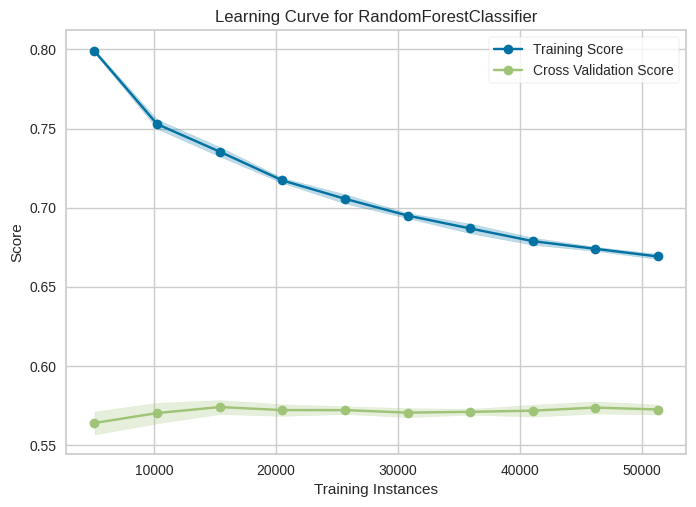

<Axes: title={'center': 'Learning Curve for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [49]:
# Plotting a learning curve to see how well the model learn from the training data
clf_forest = RandomForestClassifier(
    class_weight="balanced",
    random_state=42
)

# F1 macro score is used as it 
viz = LearningCurve(
    clf_forest,
    scoring='f1_macro',   
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5
)

viz.fit(X, y)
viz.show()
# The learning curve shows the model is underfitting.

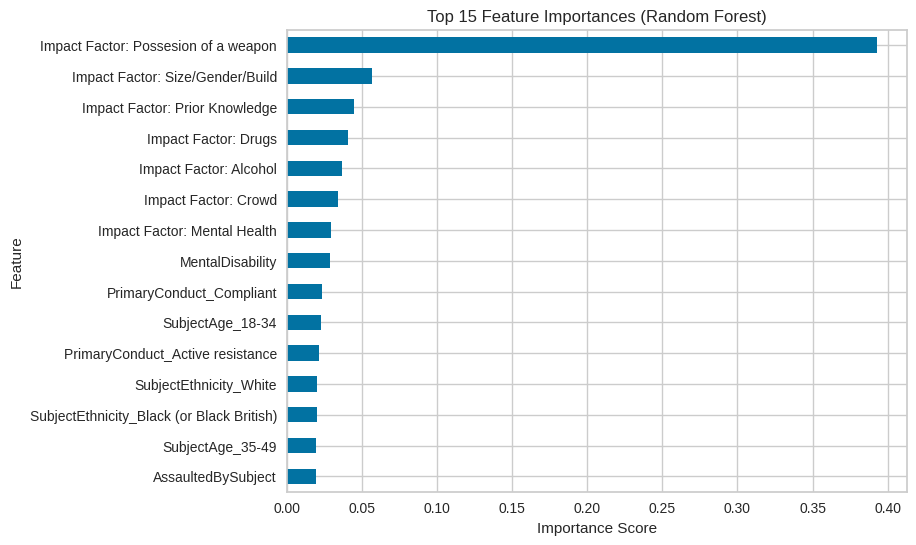

In [50]:
# Extract importance scores
importances_forest = pd.Series(rf_model.feature_importances_, index=X.columns)

# Sort from most important to least
importances_forest = importances_forest.sort_values(ascending=False)

# Plot top 15
plt.figure(figsize=(8, 6))
importances_forest.head(15).plot(kind='barh')
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # Most important at top
plt.show()


Overall, these results indicate that Taser use is most strongly associated with perceived threat levels, whether due to weapons, physical attributes, prior behaviour, or intoxication. 

## 6.5.5Balanced: XGBoost model

In [51]:
# model training
xgb_model = xgb.XGBClassifier(random_state = 42, scale_pos_weight = 15.6)

xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

### 6.5.6Evaluating the balanced XGBoost model

In [52]:
print("Accuracy :", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall   :", recall_score(y_test, y_pred_xgb))
print("F1 Score :", f1_score(y_test, y_pred_xgb))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob_xgb))

print("\nClassification Report:\n")
print(metrics.classification_report(y_test, y_pred_xgb))


Accuracy : 0.7824019951679526
Precision: 0.17742966751918157
Recall   : 0.7170542635658915
F1 Score : 0.28446950281906713
ROC-AUC  : 0.8091177694066878

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.79      0.87     12057
           1       0.18      0.72      0.28       774

    accuracy                           0.78     12831
   macro avg       0.58      0.75      0.58     12831
weighted avg       0.93      0.78      0.84     12831



This adjusted model leads to a recall of 0.72, indicating that the model successfully captures class 0. However, the precision remains low at 0.18, which suggests a considerable number of false positives. The overall ROC-AUC of 0.81 reflects the model's ability to separate the classes. Overall, adding class weights makes the model more sensitive to predict the minority class, but it also increases false alarms, highlighting a trade-off between identifying rare events and maintaining precision.

Confusion matrix:
 [[9484 2573]
 [ 219  555]]


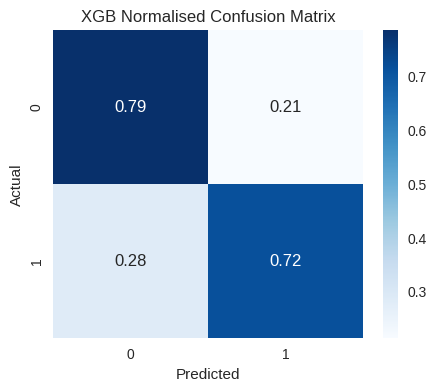

In [53]:
# Confusion Matrix
print("Confusion matrix:\n",metrics.confusion_matrix(y_test, y_pred_xgb))

cm_norm = confusion_matrix(y_test, y_pred_xgb, normalize='true')

plt.figure(figsize=(5,4))
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGB Normalised Confusion Matrix')
plt.show()

The confusion matrix demonstrated that the XGBoost model classified class 0 more precisely, 79% of the non-taser-use cases were classified correctly. Although the XGBoost model only correctly predicted 72% of the taser-use cases, it showed a huge improvement in predicting the taser-use cases compared to the one without balancing the data.

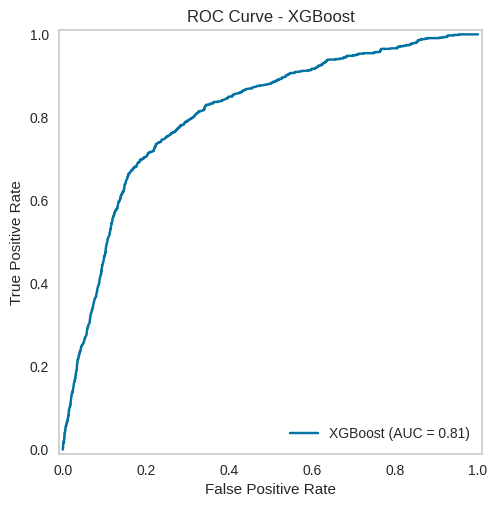

In [54]:
# ROC Curve
RocCurveDisplay.from_predictions(
    y_test,
    y_prob_xgb,
    name="XGBoost"
)

plt.title("ROC Curve - XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(False)
plt.show()

The graph further visualised that the XGBoost model can distinguish between positive and negative cases reasonably well, achieving an AUC of 0.81.

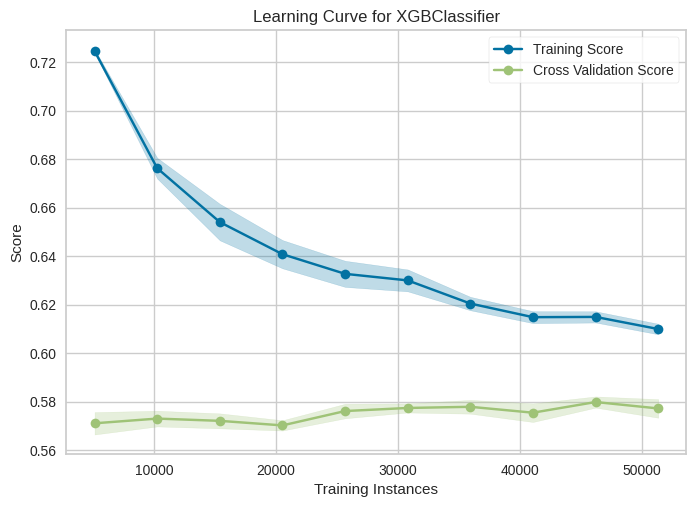

<Axes: title={'center': 'Learning Curve for XGBClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [55]:
# Drawing Learning Curve
viz = LearningCurve(
    xgb.XGBClassifier(random_state=42, scale_pos_weight = 15.6),
    scoring='f1_macro',
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5
)

viz.fit(X, y)
viz.show()
# The learning curve shows the model is underfitting.

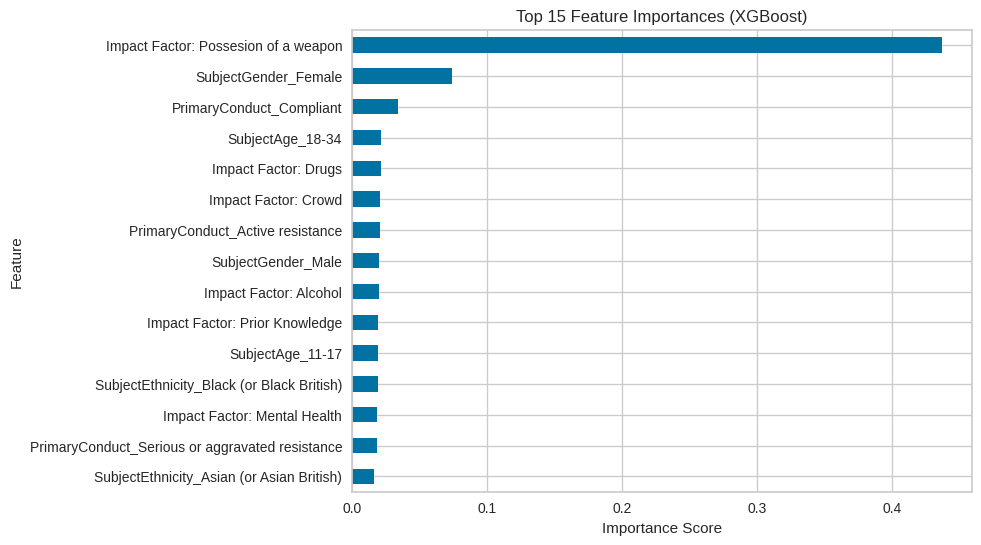

In [56]:
# Extract importance scores
importances_xgb = pd.Series(xgb_model.feature_importances_, index=X.columns)

# Sort from most important to least
importances_xgb = importances_xgb.sort_values(ascending=False)

# Plot top 15
plt.figure(figsize=(8, 6))
importances_xgb.head(15).plot(kind='barh')
plt.title("Top 15 Feature Importances (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # Most important at top
plt.show()

The feature-importance chart shows that possession of a weapon is the most influential predictor of taser use. The importance score of it is substantially higher than other factors, indicating that this factor contributes most to the model's ability to classify between taser-use cases and no-taser-use cases.

## 6.6Prediction model comparison

Among the three models, XGBoost performs the best, achieving the highest recall, F1 score, and ROC-AUC, indicating that it is most effective at identifying minority class (class 1) cases and also the most reliable model at distinguishing between classes overall. While the Random Forest attains slightly higher accuracy, its ability to detect the minority class is relatively weaker, making accuracy score an unreliable performance metric in this imbalanced setting. The Decision Tree performs notably worse than the other ML models, with lower discriminative ability and reduced recall. In conclusion, XGBoost seems to be the most robust and balanced model for predicting CED use.

# 7.Limitations and Conclusions

The ‘CED Used’ column is severely imbalanced, resulting in the ML models having a strong bias towards predicting the majority class to 0. Even though this has relatively improved after retraining the models by balancing the class weights, the limitation persists as the improved models still encounter underfitting, as demonstrated by the learning curve.

Another limitation is the possibility that the same incident is recorded as multiple entries when several officers use force on the same subject, which may inflate the predicted likelihood of ‘CED Used’.

According to the Feature Importance plot across 3 models, the most important predictor of 'CED Used' is the possession of weapon. XGBoost is also the most robust model in predicting 'CED Used'. However, due to limitation of imbalanced class predictor, further rebalancing techniques should be implemented, such as SMOTE (Chawla et al., 2011).

# 8.References

British Transport Police, 2025, "Differences between CEDs", Online, Available at: https://www.btp.police.uk/police-forces/british-transport-police/areas/campaigns/Taser/differences-between-ceds/ (Accessed: 03/12/2025)

Chawla, N.V., Bowyer, K.W., Hall, L.O. and Kegelmeyer, W.P. (2002). SMOTE: synthetic minority over-sampling technique. Journal of artificial intelligence research, 16, pp.321-357.

Dodd, V. (2024). Only 40% of people in England trust their police force, research reveal. The Guardian. Available at: https://www.theguardian.com/uk-news/2024/apr/18/only-40-of-people-in-england-trust-their-police-force-research-reveals. (Accessed: 28 November 2025)

Metropolitan Police Service. (2025) ‘Use of Force Dataset’. Available at: https://data.london.gov.uk/dataset/use-of-force-dataset-vdj3o/. (Accessed: 3 December 2025).

# 9.Appendices

## 9.1GenAI Usage

https://chatgpt.com/share/692f5606-56b0-800e-8520-aae39d5d623a

https://gemini.google.com/share/8736ed79b7ac

https://chatgpt.com/share/692f853a-f5a4-8000-b830-83619055d28d


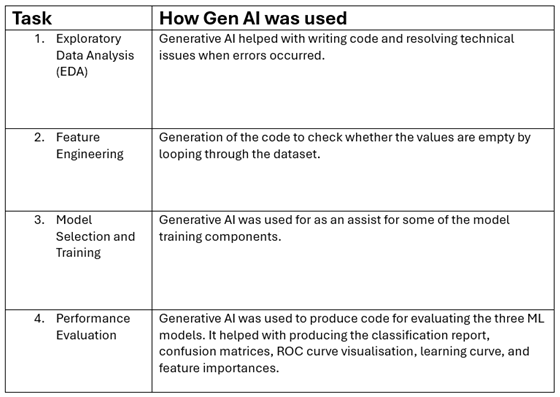

## 9.2Project Management

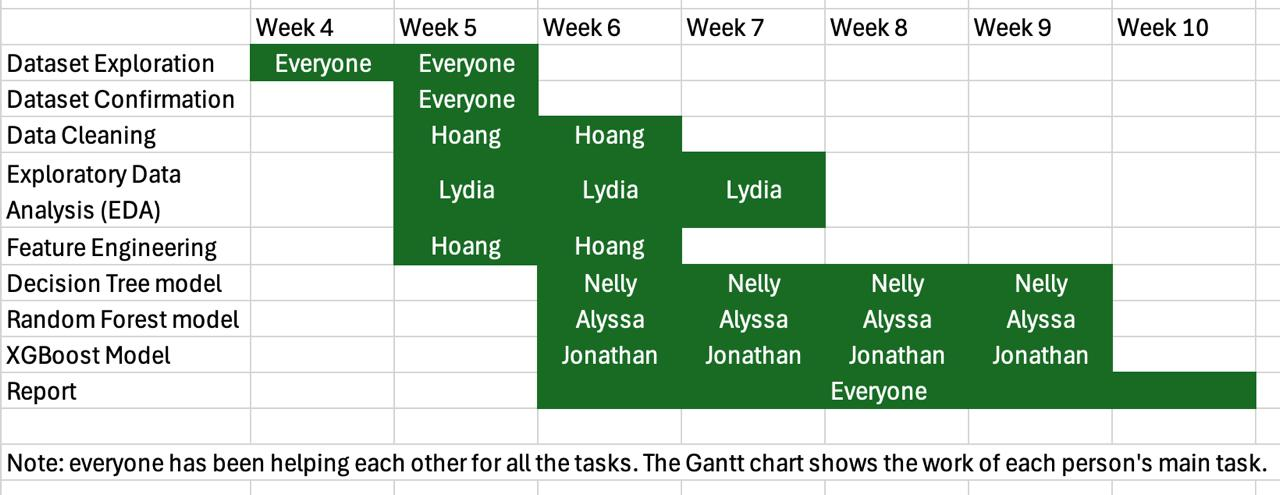